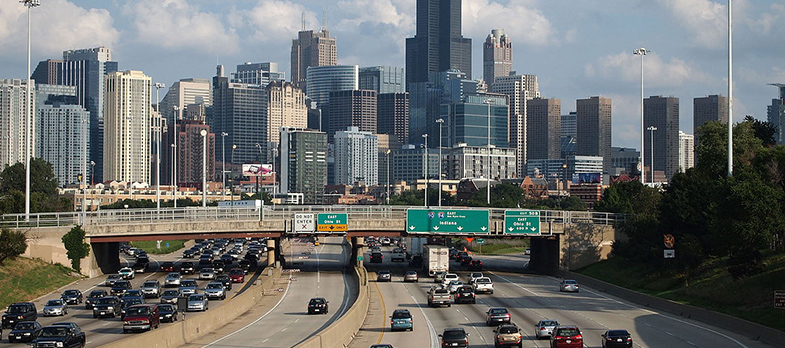

# Chicago Car Crashes: Analyzing the Causes of The City's Traffic Accidents


**By Sameeha Ramadhan**

The goal of this analysis is to examine and determine the main causes of car accidents in Chicago that result in injuries. The data used are the Chicago Car Crash datasets and is processed and filtered to reflect crashes that occured in 2021 alone. 

In this project, I will be using the data from the city of Chicago to build a classification model that can help predict why car accidents occur, as well as identify a number of trends from the incidents. Doing so will aid in allowing the city to take the correct measures to help prevent accidents and their resulting injuries from occurring.

I will be using the **OSEMin/OSEMN** process in this project.

# Obtain

## Importing the Packages

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.compose import ColumnTransformer

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score, pos_label="1")

#!pip install shap
import shap 
shap.initjs()

#!pip install dataframe_image
import dataframe_image as dfi

import folium 

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
#Loading the data
pd.set_option('display.max_columns', None)
crashes = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv')
vehicles = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv')
passengers = pd.read_csv('data/Traffic_Crashes_-_People.csv')

### Crashes

In [3]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498336 entries, 0 to 498335
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                498336 non-null  object 
 1   RD_NO                          494403 non-null  object 
 2   CRASH_DATE_EST_I               37501 non-null   object 
 3   CRASH_DATE                     498336 non-null  object 
 4   POSTED_SPEED_LIMIT             498336 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         498336 non-null  object 
 6   DEVICE_CONDITION               498336 non-null  object 
 7   WEATHER_CONDITION              498336 non-null  object 
 8   LIGHTING_CONDITION             498336 non-null  object 
 9   FIRST_CRASH_TYPE               498336 non-null  object 
 10  TRAFFICWAY_TYPE                498336 non-null  object 
 11  LANE_CNT                       198966 non-null  float64
 12  ALIGNMENT                     

In [4]:
len(crashes)

498336

In [5]:
#Filtering for the current year of 2021
crashes['CRASH_DATE'] = crashes['CRASH_DATE'].astype(str)

crashes = crashes[crashes['CRASH_DATE'].str.contains("2021")]

len(crashes)

31625

### Vehicles

In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017922 entries, 0 to 1017921
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1017922 non-null  int64  
 1   CRASH_RECORD_ID           1017922 non-null  object 
 2   RD_NO                     1009777 non-null  object 
 3   CRASH_DATE                1017922 non-null  object 
 4   UNIT_NO                   1017922 non-null  int64  
 5   UNIT_TYPE                 1016407 non-null  object 
 6   NUM_PASSENGERS            152271 non-null   float64
 7   VEHICLE_ID                994586 non-null   float64
 8   CMRC_VEH_I                18975 non-null    object 
 9   MAKE                      994581 non-null   object 
 10  MODEL                     994438 non-null   object 
 11  LIC_PLATE_STATE           909371 non-null   object 
 12  VEHICLE_YEAR              833120 non-null   float64
 13  VEHICLE_DEFECT            9

In [7]:
len(vehicles)

1017922

In [8]:
vehicles['CRASH_DATE'] = vehicles['CRASH_DATE'].astype(str)

vehicles = vehicles[vehicles['CRASH_DATE'].str.contains("2021")]

len(vehicles)

65354

### Passengers

In [9]:
len(passengers)

1100733

In [10]:
passengers['CRASH_DATE'] = passengers['CRASH_DATE'].astype(str)

passengers = passengers[passengers['CRASH_DATE'].str.contains("2021")]

len(passengers)

66772

In [11]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66772 entries, 1026587 to 1100732
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PERSON_ID              66772 non-null  object 
 1   PERSON_TYPE            66772 non-null  object 
 2   CRASH_RECORD_ID        66772 non-null  object 
 3   RD_NO                  58342 non-null  object 
 4   VEHICLE_ID             65782 non-null  float64
 5   CRASH_DATE             66772 non-null  object 
 6   SEAT_NO                12618 non-null  float64
 7   CITY                   46888 non-null  object 
 8   STATE                  47519 non-null  object 
 9   ZIPCODE                42455 non-null  object 
 10  SEX                    65760 non-null  object 
 11  AGE                    45901 non-null  float64
 12  DRIVERS_LICENSE_STATE  38447 non-null  object 
 13  DRIVERS_LICENSE_CLASS  31059 non-null  object 
 14  SAFETY_EQUIPMENT       66604 non-null  object 

### Merging

In [12]:
#Merging and observing
merged = pd.merge(left=crashes, right = vehicles, left_on='CRASH_RECORD_ID', right_on='CRASH_RECORD_ID')
df = pd.merge(left=merged, right=passengers, left_on = 'VEHICLE_ID', right_on='VEHICLE_ID')
print(df.shape)
df.head()

(1147852, 149)


,CRASH_RECORD_ID_x,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_UNIT_ID,RD_NO_y,CRASH_DATE_y,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,FIRST_CONTACT_POINT,CMV_ID,USDOT_NO,CCMC_NO,ILCC_NO,COMMERCIAL_SRC,GVWR,CARRIER_NAME,CARRIER_STATE,CARRIER_CITY,HAZMAT_PLACARDS_I,HAZMAT_NAME,UN_NO,HAZMAT_PRESENT_I,HAZMAT_REPORT_I,HAZMAT_REPORT_NO,MCS_REPORT_I,MCS_REPORT_NO,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,IDOT_PERMIT_NO,WIDE_LOAD_I,TRAILER1_WIDTH,TRAILER2_WIDTH,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID_y,RD_NO,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,014bd376500341da2e8d2ccbb6fac86d769d40cc580995...,JE115729,NaN,01/17/2021 07:07:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",01/17/2021 07:08:00 PM,FAILING TO YIELD RIGHT-OF-WAY,UNABLE TO DETERMINE,7600,S,MORGAN ST,612.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NONINCAPACITATING INJURY,3.0,0.0,0.0,2.0,1.0,1.0,0.0,19,1,1,41.755937,-87.649177,POINT (-87.649177064754 41.755937329993),1026277,JE115729,01/17/2021 07:07:00 PM,1,DRIVER,NaN,972691.0,NaN,DODGE,DURANGO,IL,2019.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,Y,NaN,1.0,NaN,ER TOWING,10300 S DOTY RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,NaN,TOTAL (ALL AREAS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1026277,DRIVER,014bd376500341da2e8d2ccbb6fac86d769d40cc580995...,JE115729,01/17/2021 07:07:00 PM,NaN,CHICAGO,IL,60620,F,34.0,IL,D,SAFETY BELT USED,NOT APPLICABLE,NONE,NONINCAPACITATING INJURY,ST.BARNARDS,CFD,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,014bd376500341da2e8d2ccbb6fac86d769d40cc580995...,JE115729,NaN,01/17/2021 07:07:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",01/17/2021 07:08:00 PM,FAILING TO YIELD RIGHT-OF-WAY,UNABLE TO DETERMINE,7600,S,MORGAN ST,612.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NONINCAPACITATING INJURY,3.0,0.0,0.0,2.0,1.0,1.0,0.0,19,1,1,41.755937,-87.649177,POINT (-87.649177064754 41.755937329993),1026278,JE115729,01/17/2021 07:07:00 PM,2,DRIVER,2.0,972692.0,NaN,FORD,F250,IL,2012.0,NONE,PICKUP,TOW TRUCK,S,STRAIGHT AHEAD,Y,NaN,3.0,NaN,SMOOTH TOWING COMPANY,NaN,NaN,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,NaN,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# Scrub

In [13]:
#I begin by converting the column names to lowercase for ease:
df= df.rename(columns=str.lower)

### Checking NaN values

In [14]:
null_values = df.isna().sum()
null_percentage = null_values[null_values>0] / len(df)
null_percentage.to_frame('% Null')

,% Null
rd_no_x,0.127116
crash_date_est_i,0.930863
lane_cnt,0.999129
report_type,0.102606
intersection_related_i,0.628868
...,...
pedpedal_visibility,0.139198
pedpedal_location,0.139198
bac_result,0.100503
bac_result value,0.999929


In [15]:
#Filtering out columns who have more than 95% of null values:
nulls = null_percentage[null_percentage > .95].index.tolist()
nulls

['lane_cnt',
 'photos_taken_i',
 'statements_taken_i',
 'dooring_i',
 'work_zone_i',
 'work_zone_type',
 'workers_present_i',
 'num_passengers',
 'cmrc_veh_i',
 'vehicle_year',
 'towed_i',
 'fire_i',
 'exceed_speed_limit_i',
 'towed_by',
 'towed_to',
 'area_00_i',
 'area_01_i',
 'area_02_i',
 'area_03_i',
 'area_04_i',
 'area_05_i',
 'area_06_i',
 'area_07_i',
 'area_08_i',
 'area_09_i',
 'area_10_i',
 'area_11_i',
 'area_12_i',
 'area_99_i',
 'cmv_id',
 'usdot_no',
 'ccmc_no',
 'ilcc_no',
 'commercial_src',
 'gvwr',
 'carrier_name',
 'carrier_state',
 'carrier_city',
 'hazmat_placards_i',
 'hazmat_name',
 'un_no',
 'hazmat_present_i',
 'hazmat_report_i',
 'hazmat_report_no',
 'mcs_report_i',
 'mcs_report_no',
 'hazmat_vio_cause_crash_i',
 'mcs_vio_cause_crash_i',
 'idot_permit_no',
 'wide_load_i',
 'trailer1_width',
 'trailer2_width',
 'trailer1_length',
 'trailer2_length',
 'total_vehicle_length',
 'axle_cnt',
 'vehicle_config',
 'cargo_body_type',
 'load_type',
 'hazmat_out_of_servi

In [16]:
#Since the majority of the values in these columns are missing, I will remove them all:

df = df.drop(columns = nulls)
#Then examine:
print(df.shape)
df.info()

(1147852, 83)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147852 entries, 0 to 1147851
Data columns (total 83 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   crash_record_id_x              1147852 non-null  object 
 1   rd_no_x                        1001942 non-null  object 
 2   crash_date_est_i               79359 non-null    object 
 3   crash_date_x                   1147852 non-null  object 
 4   posted_speed_limit             1147852 non-null  int64  
 5   traffic_control_device         1147852 non-null  object 
 6   device_condition               1147852 non-null  object 
 7   weather_condition              1147852 non-null  object 
 8   lighting_condition             1147852 non-null  object 
 9   first_crash_type               1147852 non-null  object 
 10  trafficway_type                1147852 non-null  object 
 11  alignment                      1147852 non-null  object 
 12  

### Removing Irrelevant Columns
After a quick examination, I've determined these columns do not provide valuable information about determining the cause of these car accidents, and have decided to remove them.

In [17]:
drop = ['rd_no_x', 'rd_no_y','rd_no','report_type', 'crash_type', 'damage', 'date_police_notified', 'injuries_fatal', 
        'sec_contributory_cause','injuries_incapacitating', 'most_severe_injury','injuries_non_incapacitating',
        'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown',
        'ejection','injury_classification', 'hospital', 'crash_record_id_x', 'crash_date_x', 'alignment',
        'intersection_related_i','num_units','crash_unit_id', 'ems_agency', 'pedpedal_action', 'pedpedal_visibility',
        'pedpedal_location','person_id', "crash_record_id_y", 'street_no', 'street_direction', 'street_name',
        'zipcode', 'crash_month', 'latitude', 'longitude', 'crash_date_y', 'unit_no', 'city', 'crash_date_est_i',
        'not_right_of_way_i', 'vehicle_id', 'model', 'lic_plate_state', 'vehicle_use', 'travel_direction', 'maneuver',
        'occupant_cnt', 'first_contact_point']

df = df.drop(columns = drop, axis = 1)
print(df.shape)
df.head()

(1147852, 33)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,location,unit_type,make,vehicle_defect,vehicle_type,person_type,crash_date,state,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_action,driver_vision,physical_condition,bac_result
0,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,3.0,19,1,POINT (-87.649177064754 41.755937329993),DRIVER,DODGE,NONE,PASSENGER,DRIVER,01/17/2021 07:07:00 PM,IL,F,34.0,IL,D,SAFETY BELT USED,NOT APPLICABLE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
1,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,3.0,19,1,POINT (-87.649177064754 41.755937329993),DRIVER,FORD,NONE,PICKUP,PASSENGER,01/17/2021 07:07:00 PM,IL,M,46.0,NaN,NaN,SAFETY BELT USED,NOT APPLICABLE,NaN,NaN,NaN,NaN
2,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,3.0,19,1,POINT (-87.649177064754 41.755937329993),DRIVER,FORD,NONE,PICKUP,DRIVER,01/17/2021 07:07:00 PM,IL,M,23.0,IL,D,SAFETY BELT USED,NOT APPLICABLE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,3.0,19,1,POINT (-87.649177064754 41.755937329993),DRIVER,FORD,NONE,PICKUP,PASSENGER,01/17/2021 07:07:00 PM,IL,M,29.0,NaN,NaN,SAFETY BELT USED,"DEPLOYED, SIDE",NaN,NaN,NaN,NaN
4,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DARKNESS,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,2212.0,1.0,19,7,POINT (-87.681483286498 41.697537048263),DRIVER,CHEVROLET,NONE,PASSENGER,DRIVER,02/27/2021 07:10:00 PM,IL,M,61.0,IL,C,SAFETY BELT USED,NOT APPLICABLE,FAILED TO YIELD,NOT OBSCURED,NORMAL,TEST NOT OFFERED


In [18]:
df.shape

(1147852, 33)

In [19]:
#Now that I've cleaned the data a bit, I will first remove any duplicate crashes:
df.drop_duplicates(subset=['location', 'crash_date'], keep='last', inplace=True)

In [20]:
#And drop the Location and Crash Date columns since I've determined they provide no answers as to the cause of accidents:
drop2 = ['location', 'crash_date']
df = df.drop(columns = drop2, axis = 1)
df.head()
print(df.shape)

(920827, 31)


# Checking the Values of Each Column:

In [21]:
for col in df.columns:
    try:
        print(col, df[col].value_counts(dropna=False)[:10]) #<--Display the first 10 only
    except:
        print(col, df[col].value_counts())
        #The first print statement will throw an error for an invalid index slice if there are less than 5 unique 
        #values in a column
    print('\n')

posted_speed_limit 30    687490
25     65134
35     50459
15     48819
20     30732
10     24675
5       4689
40      3046
0       1902
45      1085
Name: posted_speed_limit, dtype: int64


traffic_control_device NO CONTROLS                 438694
TRAFFIC SIGNAL              319778
STOP SIGN/FLASHER           103501
UNKNOWN                      37472
PEDESTRIAN CROSSING SIGN      9157
OTHER                         4743
YIELD                         2774
FLASHING CONTROL SIGNAL       1846
OTHER REG. SIGN                955
RAILROAD CROSSING GATE         927
Name: traffic_control_device, dtype: int64


device_condition NO CONTROLS                 441669
FUNCTIONING PROPERLY        392087
UNKNOWN                      70177
OTHER                         8467
FUNCTIONING IMPROPERLY        6508
NOT FUNCTIONING               1908
WORN REFLECTIVE MATERIAL         9
MISSING                          2
Name: device_condition, dtype: int64


weather_condition CLEAR                     701568
SNOW 

physical_condition NORMAL                          591328
UNKNOWN                         186711
NaN                              66424
REMOVED BY EMS                   30255
OTHER                            15634
IMPAIRED - ALCOHOL               11785
HAD BEEN DRINKING                 8769
EMOTIONAL                         3950
IMPAIRED - DRUGS                  3901
IMPAIRED - ALCOHOL AND DRUGS       984
Name: physical_condition, dtype: int64


bac_result TEST NOT OFFERED                   815041
NaN                                 89775
TEST PERFORMED, RESULTS UNKNOWN      7842
TEST REFUSED                         7142
TEST TAKEN                           1027
Name: bac_result, dtype: int64




## Removing more columns after careful review

I've determined the following columns are either irrelevant, most values are unknown, or are not applicable (i.e. bac_result; most tests were not offered) and therefore have decided to remove them:

In [22]:
drop = ['vehicle_defect', 'make', 'person_type', 'state', 'driver_action', 'physical_condition',
       'bac_result']
df = df.drop(columns=drop)
print(df.shape)
display(df.head())
df.info()

(920827, 24)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,vehicle_type,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,3.0,19,1,DRIVER,PICKUP,M,29.0,NaN,NaN,SAFETY BELT USED,"DEPLOYED, SIDE",NaN
5,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DARKNESS,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,2212.0,1.0,19,7,DRIVER,PASSENGER,F,78.0,IL,C,SAFETY BELT USED,NOT APPLICABLE,NOT OBSCURED
7,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO DEFECTS,NaN,UNABLE TO DETERMINE,1925.0,0.0,16,7,DRIVER,PASSENGER,M,56.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED
11,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,815.0,0.0,17,1,DRIVER,SPORT UTILITY VEHICLE (SUV),F,24.0,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NaN
13,30,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,DRY,NO DEFECTS,Y,FAILING TO REDUCE SPEED TO AVOID CRASH,822.0,0.0,5,2,DRIVER,BUS OVER 15 PASS.,F,NaN,IL,NaN,SAFETY BELT USED,NOT APPLICABLE,NOT OBSCURED


<class 'pandas.core.frame.DataFrame'>
Int64Index: 920827 entries, 3 to 1147851
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   posted_speed_limit       920827 non-null  int64  
 1   traffic_control_device   920827 non-null  object 
 2   device_condition         920827 non-null  object 
 3   weather_condition        920827 non-null  object 
 4   lighting_condition       920827 non-null  object 
 5   first_crash_type         920827 non-null  object 
 6   trafficway_type          920827 non-null  object 
 7   roadway_surface_cond     920827 non-null  object 
 8   road_defect              920827 non-null  object 
 9   hit_and_run_i            363082 non-null  object 
 10  prim_contributory_cause  920827 non-null  object 
 11  beat_of_occurrence       920827 non-null  float64
 12  injuries_total           920827 non-null  float64
 13  crash_hour               920827 non-null  int64  
 14  cra

In [23]:
len(df)

920827

# Binning and Cleaning Categorical Data

## crash_hour:

In [24]:
#I'll first observe the values to determine how I'll bin based on the hours:
df.crash_hour.value_counts()

17    81614
16    74532
15    69979
18    62177
14    61614
13    59625
19    55357
11    54804
12    50382
20    44178
9     42520
8     39621
10    37126
21    36683
22    23736
23    21842
7     20164
1     18012
0     13543
6     12454
4     11304
2     10491
5     10441
3      8628
Name: crash_hour, dtype: int64

### Creating time bins for crash_hour

These bins will correspond with the following times:

**0-6                   =   Midnight/Early Morning (12 A.M. to 6 A.M.)**

**6-12    =   Morning (6 A.M. to 12 P.M.)** 

**12-18   =   Afternoon/Rush Hour (12 P.M. to 6 P.M.)**

**18-23   =   Evening/Night (6 P.M. to 11 P.M.)**

In [25]:
df['time_bins'] = pd.cut(x=df['crash_hour'], bins = [0,6,12,18,23], 
                         labels = ['Midnight/Early Morning', 'Morning', 'Afternoon/Rush Hour','Evening/Night'])
df.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,vehicle_type,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,time_bins
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,3.0,19,1,DRIVER,PICKUP,M,29.0,NaN,NaN,SAFETY BELT USED,"DEPLOYED, SIDE",NaN,Evening/Night
5,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DARKNESS,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,2212.0,1.0,19,7,DRIVER,PASSENGER,F,78.0,IL,C,SAFETY BELT USED,NOT APPLICABLE,NOT OBSCURED,Evening/Night
7,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO DEFECTS,NaN,UNABLE TO DETERMINE,1925.0,0.0,16,7,DRIVER,PASSENGER,M,56.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,Afternoon/Rush Hour
11,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,815.0,0.0,17,1,DRIVER,SPORT UTILITY VEHICLE (SUV),F,24.0,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NaN,Afternoon/Rush Hour
13,30,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,DRY,NO DEFECTS,Y,FAILING TO REDUCE SPEED TO AVOID CRASH,822.0,0.0,5,2,DRIVER,BUS OVER 15 PASS.,F,NaN,IL,NaN,SAFETY BELT USED,NOT APPLICABLE,NOT OBSCURED,Midnight/Early Morning


I will then repeat similar processing for the remaining categorical columns.

## posted_speed_limit:

In [26]:
df.posted_speed_limit.value_counts()

30    687490
25     65134
35     50459
15     48819
20     30732
10     24675
5       4689
40      3046
0       1902
45      1085
55       939
24       917
2        914
50         7
3          7
34         3
39         3
60         2
32         1
14         1
9          1
1          1
Name: posted_speed_limit, dtype: int64

In [27]:
#Binning and previewing:
df['speed_limit'] = pd.cut(x=df['posted_speed_limit'], bins = [0,15,25,40,75], 
                         labels = ['0-15', '16-25', '26-40', 'Over 40'])
df.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,vehicle_type,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,time_bins,speed_limit
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,3.0,19,1,DRIVER,PICKUP,M,29.0,NaN,NaN,SAFETY BELT USED,"DEPLOYED, SIDE",NaN,Evening/Night,26-40
5,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DARKNESS,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,2212.0,1.0,19,7,DRIVER,PASSENGER,F,78.0,IL,C,SAFETY BELT USED,NOT APPLICABLE,NOT OBSCURED,Evening/Night,26-40
7,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO DEFECTS,NaN,UNABLE TO DETERMINE,1925.0,0.0,16,7,DRIVER,PASSENGER,M,56.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,Afternoon/Rush Hour,26-40
11,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,815.0,0.0,17,1,DRIVER,SPORT UTILITY VEHICLE (SUV),F,24.0,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NaN,Afternoon/Rush Hour,26-40
13,30,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,DRY,NO DEFECTS,Y,FAILING TO REDUCE SPEED TO AVOID CRASH,822.0,0.0,5,2,DRIVER,BUS OVER 15 PASS.,F,NaN,IL,NaN,SAFETY BELT USED,NOT APPLICABLE,NOT OBSCURED,Midnight/Early Morning,26-40


## age:

In [28]:
#Previewing:
df.age.value_counts()

25.0     21088
32.0     20948
26.0     20086
28.0     20071
55.0     18813
         ...  
93.0         2
96.0         1
95.0         1
98.0         1
101.0        1
Name: age, Length: 99, dtype: int64

In [29]:
df['age_groups'] = pd.cut(x=df['age'], bins = [0,15,24,35,55,100], 
                         labels = ['15 & Under', '16-24', 
                        '25-35', '36-55','56&Up'])
df.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,vehicle_type,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,time_bins,speed_limit,age_groups
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,3.0,19,1,DRIVER,PICKUP,M,29.0,NaN,NaN,SAFETY BELT USED,"DEPLOYED, SIDE",NaN,Evening/Night,26-40,25-35
5,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DARKNESS,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,2212.0,1.0,19,7,DRIVER,PASSENGER,F,78.0,IL,C,SAFETY BELT USED,NOT APPLICABLE,NOT OBSCURED,Evening/Night,26-40,56&Up
7,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO DEFECTS,NaN,UNABLE TO DETERMINE,1925.0,0.0,16,7,DRIVER,PASSENGER,M,56.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,Afternoon/Rush Hour,26-40,56&Up
11,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,815.0,0.0,17,1,DRIVER,SPORT UTILITY VEHICLE (SUV),F,24.0,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NaN,Afternoon/Rush Hour,26-40,16-24
13,30,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,DRY,NO DEFECTS,Y,FAILING TO REDUCE SPEED TO AVOID CRASH,822.0,0.0,5,2,DRIVER,BUS OVER 15 PASS.,F,NaN,IL,NaN,SAFETY BELT USED,NOT APPLICABLE,NOT OBSCURED,Midnight/Early Morning,26-40,NaN


## traffic_control_device:

In [30]:
df.traffic_control_device.value_counts()

NO CONTROLS                 438694
TRAFFIC SIGNAL              319778
STOP SIGN/FLASHER           103501
UNKNOWN                      37472
PEDESTRIAN CROSSING SIGN      9157
OTHER                         4743
YIELD                         2774
FLASHING CONTROL SIGNAL       1846
OTHER REG. SIGN                955
RAILROAD CROSSING GATE         927
BICYCLE CROSSING SIGN          914
OTHER WARNING SIGN              27
DELINEATORS                     18
RR CROSSING SIGN                 7
POLICE/FLAGMAN                   6
SCHOOL ZONE                      5
OTHER RAILROAD CROSSING          2
NO PASSING                       1
Name: traffic_control_device, dtype: int64

In [31]:
#Mapping out:
traffic_control_mapping = {'NO CONTROLS': 'NO CONTROLS',
                    'TRAFFIC SIGNAL': 'SIGNAL/SIGN',
                    'STOP SIGN/FLASHER': 'SIGNAL/SIGN',
                    'UNKNOWN': 'OTHER-UNKNOWN',
                    'OTHER': 'OTHER-UNKNOWN',
                    'YIELD': 'OTHER-UNKNOWN',
                    'SCHOOL ZONE' : 'OTHER-UNKNOWN',
                    'PEDESTRIAN CROSSING SIGN' : 'SIGNAL/SIGN',
                    'FLASHING CONTROL SIGNAL' : 'SIGNAL/SIGN',
                    'OTHER REG. SIGN' :'OTHER-UNKNOWN',
                    'RAILROAD CROSSING GATE' : 'OTHER-UNKNOWN',
                    'BICYCLE CROSSING SIGN'  : 'OTHER-UNKNOWN',
                    'OTHER WARNING SIGN' : 'OTHER-UNKNOWN',
                    'DELINEATORS' : 'OTHER-UNKNOWN',
                    'RR CROSSING SIGN' : 'SIGNAL/SIGN',
                    'POLICE/FLAGMAN' : 'OTHER-UNKNOWN',
                    'OTHER RAILROAD CROSSING' : 'OTHER-UNKNOWN',
                    'NO PASSING' : 'SIGNAL/SIGN'}

df.traffic_control_device = df.traffic_control_device.map(traffic_control_mapping)
df.traffic_control_device.value_counts()

NO CONTROLS      438694
SIGNAL/SIGN      434290
OTHER-UNKNOWN     47843
Name: traffic_control_device, dtype: int64

## device_condition:

In [32]:
df.device_condition.value_counts()

NO CONTROLS                 441669
FUNCTIONING PROPERLY        392087
UNKNOWN                      70177
OTHER                         8467
FUNCTIONING IMPROPERLY        6508
NOT FUNCTIONING               1908
WORN REFLECTIVE MATERIAL         9
MISSING                          2
Name: device_condition, dtype: int64

In [33]:
#Mapping
devices_mapping = {'NO CONTROLS': 'NO CONTROLS',
              'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
              'UNKNOWN': 'UNKNOWN-NOT FUNCTIONING',
              'OTHER': 'UNKNOWN-NOT FUNCTIONING',
              'FUNCTIONING IMPROPERLY': 'UNKNOWN-NOT FUNCTIONING',
              'NOT FUNCTIONING ': 'UNKNOWN-NOT FUNCTIONING',
              'WORN REFLECTIVE MATERIAL' : 'UNKNOWN-NOT FUNCTIONING' ,
              'MISSING' : 'UNKNOWN-NOT FUNCTIONING'}

df.device_condition = df.device_condition.map(devices_mapping)
df.device_condition.value_counts()

NO CONTROLS                441669
FUNCTIONING PROPERLY       392087
UNKNOWN-NOT FUNCTIONING     85163
Name: device_condition, dtype: int64

## weather_condition:

In [34]:
df.weather_condition.value_counts()

CLEAR                     701568
SNOW                       89915
RAIN                       66082
UNKNOWN                    25325
CLOUDY/OVERCAST            22870
BLOWING SNOW                4656
OTHER                       3813
FREEZING RAIN/DRIZZLE       3775
FOG/SMOKE/HAZE              1853
SEVERE CROSS WIND GATE       918
SLEET/HAIL                    52
Name: weather_condition, dtype: int64

In [35]:
#Mapping
weather_mapping = {'CLEAR': 'CLEAR',
               'RAIN': 'RAIN/CLOUDY/OTHER',
               'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
               'UNKNOWN': 'RAIN/CLOUDY/OTHER',
               'BLOWING SNOW' : 'RAIN/CLOUDY/OTHER',
               'OTHER ': 'RAIN/CLOUDY/OTHER',
               'FREEZING RAIN/DRIZZLE' : 'RAIN/CLOUDY/OTHER',
               'FOG/SMOKE/HAZE' : 'RAIN/CLOUDY/OTHER',
               'SEVERE CROSS WIND GATE' : 'RAIN/CLOUDY/OTHER',
               'SLEET/HAIL' : 'RAIN/CLOUDY/OTHER',}

df.weather_condition = df.weather_condition.map(weather_mapping)
df.weather_condition.value_counts()

CLEAR                701568
RAIN/CLOUDY/OTHER    125531
Name: weather_condition, dtype: int64

## first_crash_type:

In [36]:
df.first_crash_type.value_counts()

PEDESTRIAN                      503616
PEDALCYCLIST                    210219
FIXED OBJECT                     57571
PARKED MOTOR VEHICLE             43457
OTHER OBJECT                     26812
TURNING                          19680
REAR END                         19189
ANGLE                            17099
SIDESWIPE SAME DIRECTION         11351
ANIMAL                            2754
SIDESWIPE OPPOSITE DIRECTION      2334
REAR TO FRONT                     2315
OTHER NONCOLLISION                1883
HEAD ON                           1238
REAR TO SIDE                      1196
REAR TO REAR                        84
OVERTURNED                          28
TRAIN                                1
Name: first_crash_type, dtype: int64

In [37]:
first_crash_mapping = {'PEDESTRIAN': 'PED/CYCLIST',
                       'PEDALCYCLIST': 'PED/CYCLIST',
                       'FIXED OBJECT': 'PARKED/FIXED',
                       'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                       'OTHER OBJECT': 'OTHER',
                       'TURNING': 'TURNING-ANGLE',
                       'REAR END': 'REAR END',
                       'ANGLE': 'TURNING-ANGLE',
                       'SIDESWIPE SAME DIRECTION': 'SIDESWIPE', 
                       'ANIMAL' : 'OTHER', 
                       'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                       'REAR TO FRONT' : 'OTHER',
                       'OTHER NONCOLLISION': 'OTHER',
                       'HEAD ON': 'OTHER',
                       'REAR TO SIDE': 'OTHER',
                       'REAR TO REAR': 'OTHER',
                       'OVERTURNED' : 'OTHER',
                       'TRAIN' : 'OTHER'}

df.first_crash_type = df.first_crash_type.map(first_crash_mapping)
df.first_crash_type.value_counts()

PED/CYCLIST      713835
PARKED/FIXED     101028
TURNING-ANGLE     36779
OTHER             36311
REAR END          19189
SIDESWIPE         11351
Name: first_crash_type, dtype: int64

## trafficway_type

In [38]:
df.trafficway_type.value_counts()

NOT DIVIDED                        354504
FOUR WAY                           148750
DIVIDED - W/MEDIAN (NOT RAISED)    130698
ONE-WAY                             97488
PARKING LOT                         45954
DIVIDED - W/MEDIAN BARRIER          39978
ALLEY                               32520
T-INTERSECTION                      20680
OTHER                               19111
DRIVEWAY                             7400
Y-INTERSECTION                       5538
FIVE POINT, OR MORE                  4621
UNKNOWN                              3959
CENTER TURN LANE                     3844
UNKNOWN INTERSECTION TYPE            1957
RAMP                                 1898
TRAFFIC ROUTE                         960
L-INTERSECTION                        923
ROUNDABOUT                             23
NOT REPORTED                           21
Name: trafficway_type, dtype: int64

In [39]:
trafficway_mapping = {'NOT DIVIDED': 'NOT DIVIDED',
                      'FOUR WAY': 'FOUR WAY',
                      'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                      'ONE-WAY': 'ONE-WAY',
                      'PARKING LOT': 'PARKING LOT',
                      'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                      'ALLEY': 'DRIVEWAY-OTHER',
                      'T-INTERSECTION': 'DRIVEWAY-OTHER',
                      'OTHER': 'DRIVEWAY-OTHER',
                      'DRIVEWAY' : 'DRIVEWAY-OTHER',
                      'Y-INTERSECTION': 'DRIVEWAY-OTHER',
                      'FIVE POINT, OR MORE' : 'DRIVEWAY-OTHER',
                      'UNKNOWN': 'UNKNOWN',
                      'CENTER TURN LANE': 'DRIVEWAY-OTHER',
                      'UNKNOWN INTERSECTION TYPE': 'UNKNOWN',
                      'RAMP' : 'DRIVEWAY-OTHER',
                      'TRAFFIC ROUTE' : 'DRIVEWAY-OTHER',
                      'L-INTERSECTION' : 'DRIVEWAY-OTHER',
                      'ROUNDABOUT' : 'FOUR WAY',
                      'NOT REPORTED': 'UNKNOWN'}

df.trafficway_type = df.trafficway_type.map(trafficway_mapping)
df.trafficway_type.value_counts()

NOT DIVIDED       354504
DIVIDED           170676
FOUR WAY          148773
DRIVEWAY-OTHER     97495
ONE-WAY            97488
PARKING LOT        45954
UNKNOWN             5937
Name: trafficway_type, dtype: int64

## road_defect:

In [40]:
df.road_defect.value_counts()

NO DEFECTS           733480
UNKNOWN              166714
OTHER                  6578
RUT, HOLES             6535
WORN SURFACE           4706
DEBRIS ON ROADWAY      1850
SHOULDER DEFECT         964
Name: road_defect, dtype: int64

In [41]:
roaddefect_map = {'NO DEFECTS': 'NO DEFECTS',
                  'UNKNOWN': 'UNKNOWN-OTHER',
                  'OTHER': 'UNKNOWN-OTHER',
                  'RUT, HOLES' : 'UNKNOWN-OTHER',
                  'WORN SURFACE' : 'UNKNOWN-OTHER',
                  'DEBRIS ON ROADWAY' : 'UNKNOWN-OTHER',
                  'SHOULDER DEFECT': 'UNKNOWN-OTHER'}

df.road_defect = df.road_defect.map(roaddefect_map)
df.road_defect.value_counts()

NO DEFECTS       733480
UNKNOWN-OTHER    187347
Name: road_defect, dtype: int64

## vehicle_type:

In [42]:
df.vehicle_type.value_counts()

PASSENGER                                 18484
UNKNOWN/NA                                 4249
SPORT UTILITY VEHICLE (SUV)                3953
VAN/MINI-VAN                               1283
PICKUP                                     1043
TRUCK - SINGLE UNIT                         744
OTHER                                       584
BUS OVER 15 PASS.                           427
TRACTOR W/ SEMI-TRAILER                     349
BUS UP TO 15 PASS.                          158
SINGLE UNIT TRUCK WITH TRAILER               99
MOTORCYCLE (OVER 150CC)                      42
OTHER VEHICLE WITH TRAILER                   37
TRACTOR W/O SEMI-TRAILER                     34
MOPED OR MOTORIZED BICYCLE                   11
ALL-TERRAIN VEHICLE (ATV)                     7
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          2
FARM EQUIPMENT                                2
RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)        1
Name: vehicle_type, dtype: int64

In [43]:
vehicletype_map = {'PASSENGER': 'PASSENGER',
               'UNKNOWN/NA': 'UNKNOWN/NA',
               'SPORT UTILITY VEHICLE (SUV)': 'SUV/VAN/PICKUP',
               'VAN/MINI-VAN': 'SUV/VAN/PICKUP',
               'PICKUP': 'SUV/VAN/PICKUP',
               'TRUCK - SINGLE UNIT': 'BUS/TRUCK/TRAILER',
               'OTHER': 'OTHER',
               'BUS OVER 15 PASS.': 'BUS/TRUCK/TRAILER',
               'TRACTOR W/ SEMI-TRAILER': 'BUS/TRUCK/TRAILER',
               'BUS UP TO 15 PASS.': 'BUS/TRUCK/TRAILER',
               'SINGLE UNIT TRUCK WITH TRAILER': 'BUS/TRUCK/TRAILER',
               'MOTORCYCLE (OVER 150CC)': 'OTHER',
               'OTHER VEHICLE WITH TRAILER': 'OTHER',
               'TRACTOR W/O SEMI-TRAILER' : 'OTHER',
               'MOPED OR MOTORIZED BICYCLE' : 'OTHER',
               'ALL-TERRAIN VEHICLE (ATV)' : 'OTHER',
               'FARM EQUIPMENT' : 'OTHER',
               '3-WHEELED MOTORCYCLE (2 REAR WHEELS)' : 'OTHER',
               'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' : 'OTHER'}

df.vehicle_type = df.vehicle_type.map(vehicletype_map)
df.vehicle_type.value_counts()

PASSENGER            18484
SUV/VAN/PICKUP        6279
UNKNOWN/NA            4249
BUS/TRUCK/TRAILER     1777
OTHER                  720
Name: vehicle_type, dtype: int64

## safety_equipment:

In [110]:
df.safety_equipment.value_counts()

NONE PRESENT/UNUSED      541973
SAFETY EQUIPMENT USED    130549
USAGE UNKNOWN            114977
Name: safety_equipment, dtype: int64

In [44]:
safetyequip_map = {'NONE PRESENT': 'NONE PRESENT/UNUSED',
                   'HELMET NOT USED': 'NONE PRESENT/UNUSED',
                   'USAGE UNKNOWN': 'USAGE UNKNOWN',
                   'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'SAFETY EQUIPMENT USED',
                   'SAFETY BELT USED': 'SAFETY EQUIPMENT USED',
                   'SAFETY BELT NOT USED': 'NONE PRESENT/UNUSED',
                   'WHEELCHAIR' : 'USAGE UNKNOWN',
                   'BOOSTER SEAT' : 'SAFETY EQUIPMENT USED',
                   'STRETCHER' : 'USAGE UNKNOWN', 
                   'HELMET USED' : 'SAFETY EQUIPMENT USED',
                   'CHILD RESTRAINT USED' : 'SAFETY EQUIPMENT USED',
                   'CHILD RESTRAINT - FORWARD FACING': 'SAFETY EQUIPMENT USED',
                   'CHILD RESTRAINT - REAR FACING': 'SAFETY EQUIPMENT USED',
                   'CHILD RESTRAINT - TYPE UNKNOWN': 'SAFETY EQUIPMENT USED',
                   'DOT COMPLIANT MOTORCYCLE HELMET ': 'SAFETY EQUIPMENT USED',
                   'NOT DOT COMPLIANT MOTORCYCLE HELMET' : 'SAFETY EQUIPMENT USED',
                   'SHOULD/LAP BELT USED IMPROPERLY': 'NONE PRESENT/UNUSED',
                   'CHILD RESTRAINT NOT USED' : 'NONE PRESENT/UNUSED',
                   'CHILD RESTRAINT USED IMPROPERLY' : 'NONE PRESENT/UNUSED'}

df.safety_equipment = df.safety_equipment.map(safetyequip_map)
df.safety_equipment.value_counts()

NONE PRESENT/UNUSED      541973
SAFETY EQUIPMENT USED    130549
USAGE UNKNOWN            114977
Name: safety_equipment, dtype: int64

## airbag_deployed:

In [45]:
df.airbag_deployed.value_counts()

NOT APPLICABLE                            35713
DID NOT DEPLOY                            30229
DEPLOYMENT UNKNOWN                        22659
DEPLOYED, COMBINATION                      2764
DEPLOYED, SIDE                             2244
DEPLOYED, FRONT                            2102
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       15
Name: airbag_deployed, dtype: int64

In [46]:
airbagdeploy_map = {'NOT APPLICABLE': 'NOT APPLICABLE/UNKNOWN',
                    'DID NOT DEPLOY': 'DID NOT DEPLOY',
                    'DEPLOYMENT UNKNOWN': 'NOT APPLICABLE/UNKNOWN',
                    'DEPLOYED, COMBINATION': 'DEPLOYED',
                    'DEPLOYED, SIDE': 'DEPLOYED',
                    'DEPLOYED, FRONT': 'DEPLOYED',
                    'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)': 'DEPLOYED'}

df.airbag_deployed = df.airbag_deployed.map(airbagdeploy_map)
df.airbag_deployed.value_counts()

NOT APPLICABLE/UNKNOWN    58372
DID NOT DEPLOY            30229
DEPLOYED                   7125
Name: airbag_deployed, dtype: int64

## driver_vision:

In [47]:
df.driver_vision.value_counts()

NOT OBSCURED              402552
UNKNOWN                   333636
OTHER                      55666
MOVING VEHICLES             4948
PARKED VEHICLES             4941
WINDSHIELD (WATER/ICE)      2017
TREES, PLANTS                983
BUILDINGS                    978
BLINDED - HEADLIGHTS         974
BLINDED - SUNLIGHT            25
EMBANKMENT                     4
SIGNBOARD                      1
BLOWING MATERIALS              1
Name: driver_vision, dtype: int64

In [48]:
drivervision_map = {'NOT OBSCURED': 'NOT OBSCURED',
                    'UNKNOWN': 'UNKNOWN',
                    'OTHER': 'OBSCURED',
                    'MOVING VEHICLES': 'OBSCURED',
                    'PARKED VEHICLES': 'OBSCURED',
                    'WINDSHIELD (WATER/ICE)' : 'OBSCURED',
                    'TREES, PLANTS' : 'OBSCURED',
                    'BUILDINGS' : 'OBSCURED',
                    'BLINDED - HEADLIGHTS' : 'OBSCURED',
                    'BLINDED - SUNLIGHT': 'OBSCURED',
                    'EMBANKMENT' : 'OBSCURED',
                    'SIGNBOARD' : 'OBSCURED',
                    'BLOWING MATERIALS' : 'OBSCURED'}

df.driver_vision = df.driver_vision.map(drivervision_map)
df.driver_vision.value_counts()

NOT OBSCURED    402552
UNKNOWN         333636
OBSCURED         70538
Name: driver_vision, dtype: int64

# Choosing and Prepping Our Target

I will begin by creating classes where 0 means no injury and 1 means injury. Next I will rename the column and review before examining and dropping the original columns I've binned. 

In [49]:
df['injuries_total'] = df['injuries_total'].map(lambda x: 1 if x > 0 else 0)

In [50]:
#Renaming:
df.rename(columns = {'injuries_total':'injuries'}, inplace = True)

#Reviewing:
df.injuries.value_counts()

1    662545
0    258282
Name: injuries, dtype: int64

In [51]:
#These columns have been binned, so I will drop the originals
drop = ['posted_speed_limit', 'crash_hour', 'age']
df = df.drop(columns=drop)

I will now convert a number of columns to strings for easy manipulation:

In [52]:
df['beat_of_occurrence'] = df['beat_of_occurrence'].astype('str')
df['crash_day_of_week'] = df['crash_day_of_week'].astype('str')
df['injuries'] = df['injuries'].astype('str')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920827 entries, 3 to 1147851
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   traffic_control_device   920827 non-null  object  
 1   device_condition         918919 non-null  object  
 2   weather_condition        827099 non-null  object  
 3   lighting_condition       920827 non-null  object  
 4   first_crash_type         918493 non-null  object  
 5   trafficway_type          920827 non-null  object  
 6   roadway_surface_cond     920827 non-null  object  
 7   road_defect              920827 non-null  object  
 8   hit_and_run_i            363082 non-null  object  
 9   prim_contributory_cause  920827 non-null  object  
 10  beat_of_occurrence       920827 non-null  object  
 11  injuries                 920827 non-null  object  
 12  crash_day_of_week        920827 non-null  object  
 13  unit_type                855033 non-null  o

## Re-checking the Values of Each Column:

In [54]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:10]) #<--Display the first 10 only
    except:
        print(col, df[col].value_counts())
        
    print('\n')

traffic_control_device NO CONTROLS      438694
SIGNAL/SIGN      434290
OTHER-UNKNOWN     47843
Name: traffic_control_device, dtype: int64


device_condition NO CONTROLS                441669
FUNCTIONING PROPERLY       392087
UNKNOWN-NOT FUNCTIONING     85163
Name: device_condition, dtype: int64


weather_condition CLEAR                701568
RAIN/CLOUDY/OTHER    125531
Name: weather_condition, dtype: int64


lighting_condition DAYLIGHT                  572648
DARKNESS, LIGHTED ROAD    252641
DARKNESS                   39893
DUSK                       25521
UNKNOWN                    15916
DAWN                       14208
Name: lighting_condition, dtype: int64


first_crash_type PED/CYCLIST      713835
PARKED/FIXED     101028
TURNING-ANGLE     36779
OTHER             36311
REAR END          19189
SIDESWIPE         11351
Name: first_crash_type, dtype: int64


trafficway_type NOT DIVIDED       354504
DIVIDED           170676
FOUR WAY          148773
DRIVEWAY-OTHER     97495
ONE-WAY       

Resetting the index and one more look at the data:

In [55]:
df.reset_index(inplace=True)

In [56]:
df.drop('index', axis = 1, inplace =True)

In [57]:
df.head()

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,beat_of_occurrence,injuries,crash_day_of_week,unit_type,vehicle_type,sex,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,time_bins,speed_limit,age_groups
0,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,OTHER,FOUR WAY,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,612.0,1,1,DRIVER,SUV/VAN/PICKUP,M,NaN,NaN,SAFETY EQUIPMENT USED,DEPLOYED,NaN,Evening/Night,26-40,25-35
1,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING-ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,2212.0,1,7,DRIVER,PASSENGER,F,IL,C,SAFETY EQUIPMENT USED,NOT APPLICABLE/UNKNOWN,NOT OBSCURED,Evening/Night,26-40,56&Up
2,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING-ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,UNABLE TO DETERMINE,1925.0,0,7,DRIVER,PASSENGER,M,IL,NaN,SAFETY EQUIPMENT USED,DID NOT DEPLOY,NOT OBSCURED,Afternoon/Rush Hour,26-40,56&Up
3,SIGNAL/SIGN,FUNCTIONING PROPERLY,NaN,"DARKNESS, LIGHTED ROAD",TURNING-ANGLE,DRIVEWAY-OTHER,WET,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,815.0,0,1,DRIVER,SUV/VAN/PICKUP,F,NaN,NaN,SAFETY EQUIPMENT USED,DID NOT DEPLOY,NaN,Afternoon/Rush Hour,26-40,16-24
4,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE,NOT DIVIDED,DRY,NO DEFECTS,Y,FAILING TO REDUCE SPEED TO AVOID CRASH,822.0,0,2,DRIVER,BUS/TRUCK/TRAILER,F,IL,NaN,SAFETY EQUIPMENT USED,NOT APPLICABLE/UNKNOWN,NOT OBSCURED,Midnight/Early Morning,26-40,NaN


# Preparing to Model

Due to the size of this data set (just under 1 million rows), I've decided to run my models on a sample of the data. The sample should give us results as accurate as possible while allowing the models to process in a timely manner.

In [58]:
# Generating sample
sample_data = df.sample(frac =.10)
  
# Checking if sample is 10% of the data or not
  
if (0.10*(len(df))== len(sample_data)):
    print( "Data Sample")
    print(len(df), len(sample_data))

sample_data

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,beat_of_occurrence,injuries,crash_day_of_week,unit_type,vehicle_type,sex,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,time_bins,speed_limit,age_groups
54777,NO CONTROLS,NaN,CLEAR,"DARKNESS, LIGHTED ROAD",PED/CYCLIST,DRIVEWAY-OTHER,DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,111.0,1,3,PEDESTRIAN,NaN,F,NaN,NaN,NONE PRESENT/UNUSED,NaN,OBSCURED,Evening/Night,0-15,16-24
278142,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PED/CYCLIST,NOT DIVIDED,DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,722.0,1,6,PEDESTRIAN,NaN,M,NaN,NaN,NaN,NaN,NaN,Morning,26-40,36-55
798628,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PED/CYCLIST,FOUR WAY,DRY,UNKNOWN-OTHER,NaN,FAILING TO YIELD RIGHT-OF-WAY,212.0,1,3,PEDESTRIAN,NaN,M,NaN,NaN,NONE PRESENT/UNUSED,NaN,NOT OBSCURED,Afternoon/Rush Hour,26-40,15 & Under
374010,SIGNAL/SIGN,FUNCTIONING PROPERLY,RAIN/CLOUDY/OTHER,DAYLIGHT,PED/CYCLIST,NOT DIVIDED,WET,NO DEFECTS,NaN,DISREGARDING TRAFFIC SIGNALS,734.0,1,7,PEDESTRIAN,NaN,M,NaN,NaN,NONE PRESENT/UNUSED,NaN,UNKNOWN,Morning,26-40,36-55
463249,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PED/CYCLIST,NOT DIVIDED,DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,1624.0,0,7,BICYCLE,NaN,M,NaN,NaN,NaN,NaN,UNKNOWN,Afternoon/Rush Hour,26-40,36-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647977,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PED/CYCLIST,ONE-WAY,DRY,UNKNOWN-OTHER,NaN,UNABLE TO DETERMINE,722.0,1,2,PEDESTRIAN,NaN,F,NaN,NaN,NONE PRESENT/UNUSED,NaN,NOT OBSCURED,Afternoon/Rush Hour,26-40,25-35
435827,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING-ANGLE,FOUR WAY,DRY,NO DEFECTS,Y,FAILING TO YIELD RIGHT-OF-WAY,1023.0,0,2,DRIVER,NaN,F,NaN,NaN,USAGE UNKNOWN,NaN,NOT OBSCURED,Evening/Night,26-40,56&Up
875245,SIGNAL/SIGN,NO CONTROLS,CLEAR,DAYLIGHT,PED/CYCLIST,FOUR WAY,DRY,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,1234.0,1,1,PEDESTRIAN,NaN,M,NaN,NaN,NONE PRESENT/UNUSED,NaN,NOT OBSCURED,Afternoon/Rush Hour,26-40,36-55
303236,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PED/CYCLIST,NOT DIVIDED,DRY,NO DEFECTS,NaN,IMPROPER TURNING/NO SIGNAL,822.0,1,6,PEDESTRIAN,NaN,F,NaN,NaN,USAGE UNKNOWN,NaN,UNKNOWN,Morning,26-40,56&Up


## Train Test Split

In [59]:
#Setting our X, y
target = 'injuries'
X = sample_data.drop(columns= target)
y = sample_data[target]

#train_test_split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

## Preprocessing Numeric Columns:

In [60]:
#Creating a list of numerical columns:
num_cols = sample_data.drop(columns=target).select_dtypes('number').columns.tolist()
num_cols

[]

In [61]:
# Creating a Pipeline:  SimpleImputer will use the median to replace any null values and RobustScaler will use 
#the median to scale 
num_transform = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('scale', RobustScaler())])

## Preprocessing Categorical Columns:

In [62]:
categorical_cols = sample_data.drop(columns=target).select_dtypes('object').columns.tolist()
categorical_cols

['traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'first_crash_type',
 'trafficway_type',
 'roadway_surface_cond',
 'road_defect',
 'hit_and_run_i',
 'prim_contributory_cause',
 'beat_of_occurrence',
 'crash_day_of_week',
 'unit_type',
 'vehicle_type',
 'sex',
 'drivers_license_state',
 'drivers_license_class',
 'safety_equipment',
 'airbag_deployed',
 'driver_vision']

In [63]:
# OneHotEncode to scale the categorical data to a binary column
categoric_transform = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value="MISSING")),
                         ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

## ColumnTransformer

Next, we use the ColumnTransformer estimator to allow the different columns the input to be transformed separately and the features generated by each transformer to be concatenated to form a single feature space. I will combine the pipelines into one, perfom a train and test, and then convert to a dataframe:

In [64]:
# Combining pipelines:
transformed = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', categoric_transform, categorical_cols)])

# X_train and X_test
X_train_tf = transformed.fit_transform(X_train)
X_test_tf = transformed.transform(X_test)

In [65]:
# Converting the pipeline categorical columns to dataframe
pipeline_slice = transformed.named_transformers_['cat']
categoric_features = pipeline_slice.named_steps['encoder'].get_feature_names(categorical_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *categoric_features])
X_train_tf

,traffic_control_device_NO CONTROLS,traffic_control_device_OTHER-UNKNOWN,traffic_control_device_SIGNAL/SIGN,device_condition_FUNCTIONING PROPERLY,device_condition_MISSING,device_condition_NO CONTROLS,device_condition_UNKNOWN-NOT FUNCTIONING,weather_condition_CLEAR,weather_condition_MISSING,weather_condition_RAIN/CLOUDY/OTHER,lighting_condition_DARKNESS,"lighting_condition_DARKNESS, LIGHTED ROAD",lighting_condition_DAWN,lighting_condition_DAYLIGHT,lighting_condition_DUSK,lighting_condition_UNKNOWN,first_crash_type_MISSING,first_crash_type_OTHER,first_crash_type_PARKED/FIXED,first_crash_type_PED/CYCLIST,first_crash_type_REAR END,first_crash_type_SIDESWIPE,first_crash_type_TURNING-ANGLE,trafficway_type_DIVIDED,trafficway_type_DRIVEWAY-OTHER,trafficway_type_FOUR WAY,trafficway_type_NOT DIVIDED,trafficway_type_ONE-WAY,trafficway_type_PARKING LOT,trafficway_type_UNKNOWN,roadway_surface_cond_DRY,roadway_surface_cond_ICE,roadway_surface_cond_OTHER,roadway_surface_cond_SNOW OR SLUSH,roadway_surface_cond_UNKNOWN,roadway_surface_cond_WET,road_defect_NO DEFECTS,road_defect_UNKNOWN-OTHER,hit_and_run_i_MISSING,hit_and_run_i_N,hit_and_run_i_Y,prim_contributory_cause_BICYCLE ADVANCING LEGALLY ON RED LIGHT,prim_contributory_cause_CELL PHONE USE OTHER THAN TEXTING,prim_contributory_cause_DISREGARDING OTHER TRAFFIC SIGNS,prim_contributory_cause_DISREGARDING ROAD MARKINGS,prim_contributory_cause_DISREGARDING STOP SIGN,prim_contributory_cause_DISREGARDING TRAFFIC SIGNALS,prim_contributory_cause_DISREGARDING YIELD SIGN,prim_contributory_cause_DISTRACTION - FROM INSIDE VEHICLE,prim_contributory_cause_DISTRACTION - FROM OUTSIDE VEHICLE,"prim_contributory_cause_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",prim_contributory_cause_DRIVING ON WRONG SIDE/WRONG WAY,prim_contributory_cause_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,prim_contributory_cause_EQUIPMENT - VEHICLE CONDITION,"prim_contributory_cause_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",prim_contributory_cause_FAILING TO REDUCE SPEED TO AVOID CRASH,prim_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY,prim_contributory_cause_FOLLOWING TOO CLOSELY,prim_contributory_cause_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),prim_contributory_cause_IMPROPER BACKING,prim_contributory_cause_IMPROPER LANE USAGE,prim_contributory_cause_IMPROPER OVERTAKING/PASSING,prim_contributory_cause_IMPROPER TURNING/NO SIGNAL,prim_contributory_cause_NOT APPLICABLE,prim_contributory_cause_OBSTRUCTED CROSSWALKS,"prim_contributory_cause_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",prim_contributory_cause_PHYSICAL CONDITION OF DRIVER,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER,beat_of_occurrence_1011.0,beat_of_occurrence_1012.0,beat_of_occurrence_1013.0,beat_of_occurrence_1014.0,beat_of_occurrence_1021.0,beat_of_occurrence_1022.0,beat_of_occurrence_1023.0,beat_of_occurrence_1024.0,beat_of_occurrence_1031.0,beat_of_occurrence_1032.0,beat_of_occurrence_1033.0,beat_of_occurrence_1034.0,beat_of_occurrence_111.0,beat_of_occurrence_1111.0,beat_of_occurrence_1112.0,beat_of_occurrence_1113.0,beat_of_occurrence_1114.0,beat_of_occurrence_1115.0,beat_of_occurrence_112.0,beat_of_occurrence_1121.0,beat_of_occurrence_1122.0,beat_of_occurrence_1123.0,beat_of_occurrence_1124.0,beat_of_occurrence_1125.0,beat_of_occurrence_113.0,beat_of_occurrence_1131.0,beat_of_occurrence_1132.0,beat_of_occurrence_1133.0,beat_of_occurrence_1134.0,beat_of_occurrence_1135.0,beat_of_occurrence_114.0,beat_of_occurrence_121.0,beat_of_occurrence_1211.0,beat_

And now I'll explore each feature through visualizations.

# Explore:

<AxesSubplot:xlabel='crash_day_of_week', ylabel='count'>

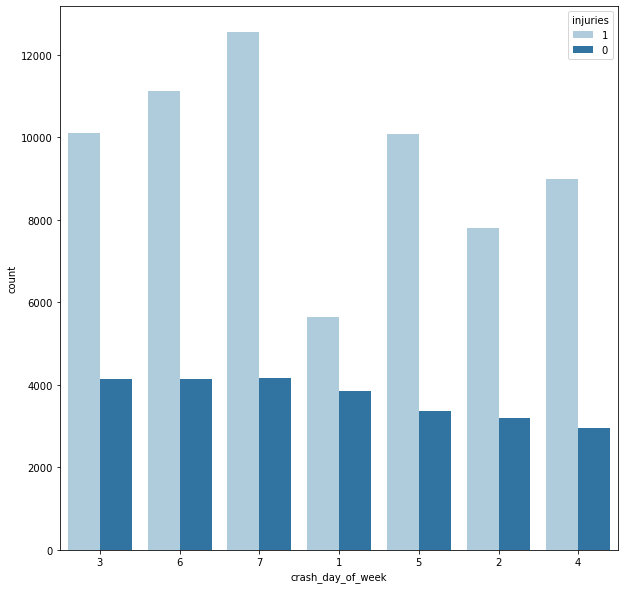

In [68]:
plt.figure(figsize=(10,10))
sns.countplot(x = "crash_day_of_week", hue = "injuries", data = sample_data, palette = "Paired")

<AxesSubplot:xlabel='trafficway_type', ylabel='count'>

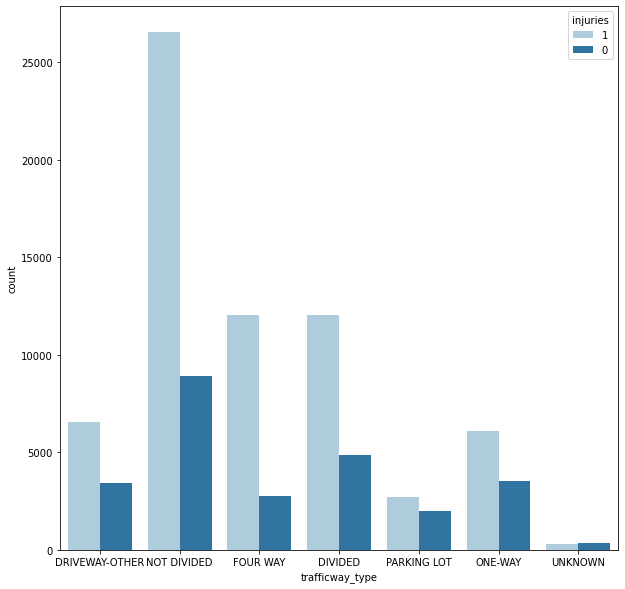

In [111]:
plt.figure(figsize=(10,10))
sns.countplot(x = "trafficway_type", hue = "injuries", data = sample_data, palette = "Paired")

<AxesSubplot:xlabel='traffic_control_device', ylabel='count'>

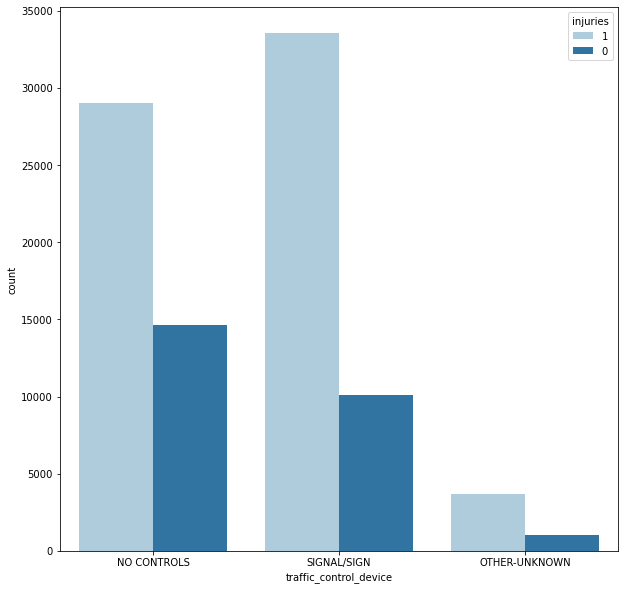

In [69]:
plt.figure(figsize=(10,10))
sns.countplot(x = "traffic_control_device", hue = "injuries", data = sample_data, palette = "Paired")

<AxesSubplot:xlabel='first_crash_type', ylabel='count'>

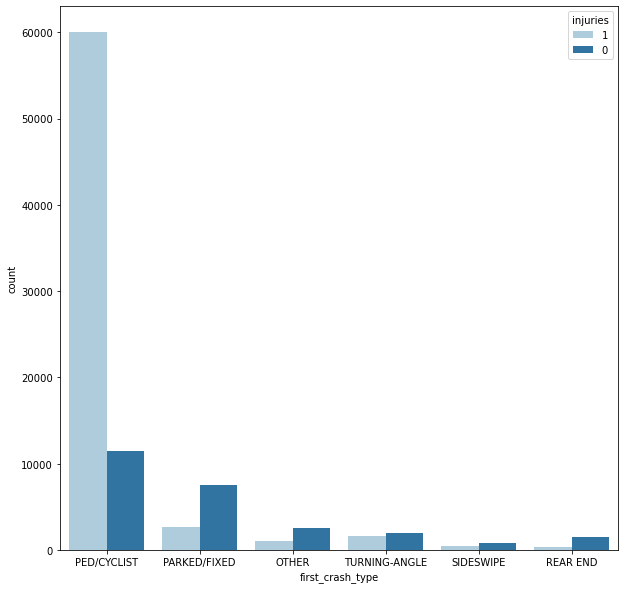

In [70]:
plt.figure(figsize=(10,10))
sns.countplot(x = "first_crash_type", hue = "injuries", data = sample_data, palette = "Paired")

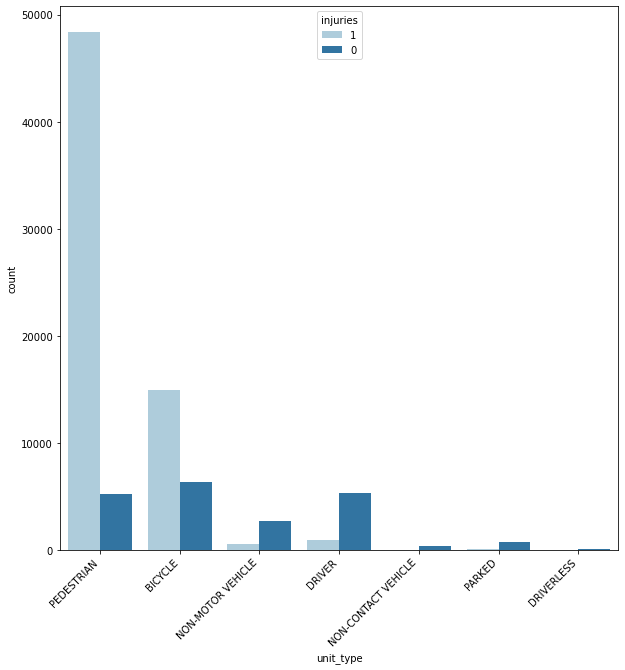

In [71]:
plt.figure(figsize=(10,10))
sns.countplot(x = "unit_type", hue = "injuries", data = sample_data, palette = "Paired")
plt.xticks(
    rotation=45, 
    horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='time_bins', ylabel='count'>

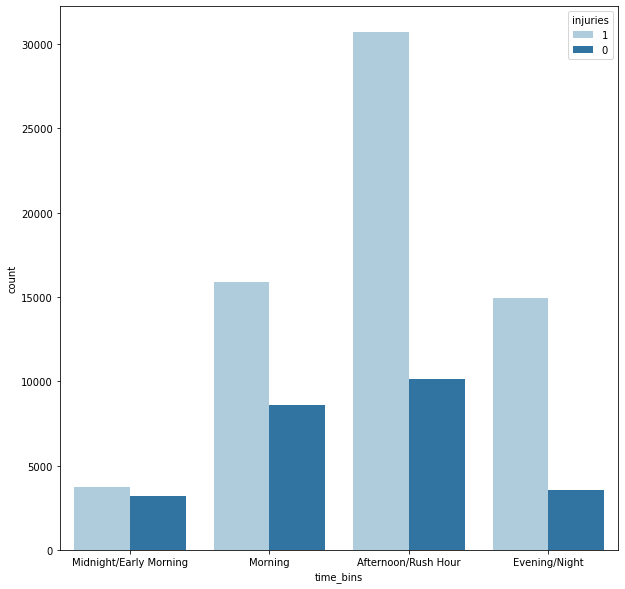

In [72]:
plt.figure(figsize=(10,10))
sns.countplot(x = "time_bins", hue = "injuries", data = sample_data, palette = "Paired")

<AxesSubplot:xlabel='age_groups', ylabel='count'>

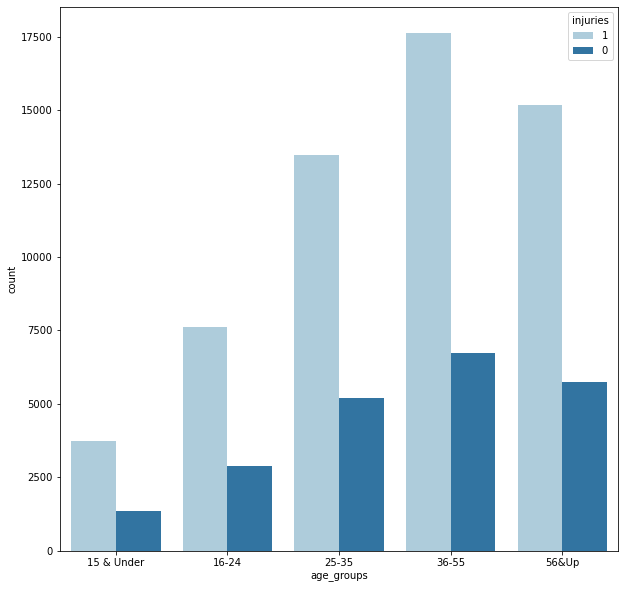

In [73]:
plt.figure(figsize=(10,10))
sns.countplot(x = "age_groups", hue = "injuries", data = sample_data, palette = "Paired")

<AxesSubplot:xlabel='sex', ylabel='count'>

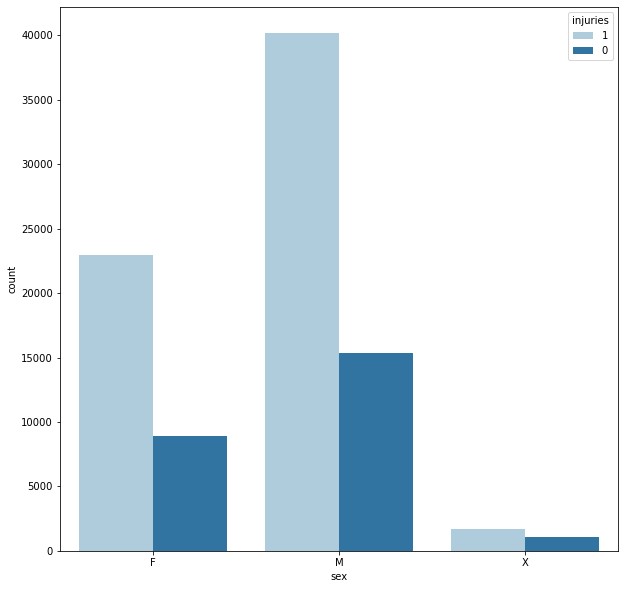

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(x = "sex", hue = "injuries", data = sample_data, palette = "Paired")

<AxesSubplot:xlabel='speed_limit', ylabel='count'>

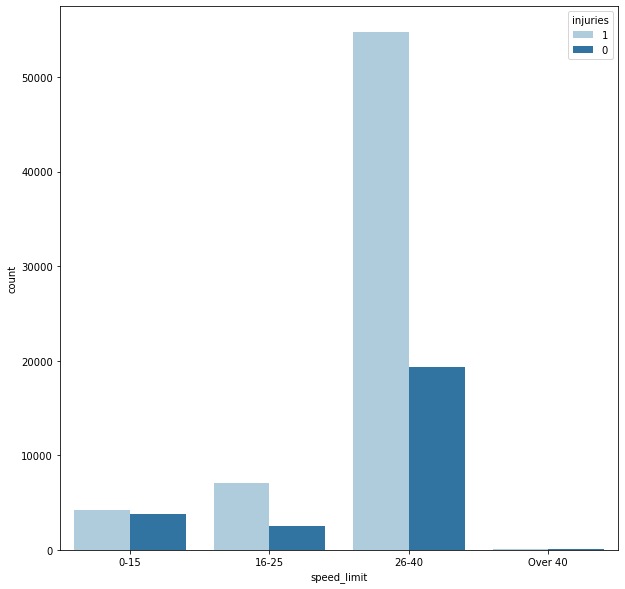

In [75]:
plt.figure(figsize=(10,10))
sns.countplot(x = "speed_limit", hue = "injuries", data = sample_data, palette = "Paired")

# Model

## Defining Functions for Modeling:

In [76]:
def evaluation(model, X_train_tf, X_test_tf, y_train, y_test, classes = None, 
                            normalize = 'true', cmap='Blues_r', label = ''):
    
    """Input a model, training data and test data to return sklearn metrics
        - Classification Report for training and test 
        - Confusion Matrix for training and test 
        - ROC Curve for training and test 
        
    """
    # Obtain predictions for train and test:
    y_pred_train = model.predict(X_train_tf)
    y_pred_test = model.predict(X_test_tf)
    
    #  Display training classification:
    header = label + "Training Classification Report"
    dashes = "---" * 20
    print(dashes, header, dashes, sep='\n')
    print(classification_report(y_train, y_pred_train, target_names = classes))
    
    # Display training figures as visualizations:
    fig, axes = plt.subplots(figsize=(10,4), ncols=2)
    
    # Planning a confusion matrix: 
    plot_confusion_matrix(model, X_train_tf, y_train, labels=classes, normalize = normalize,
                         cmap = 'Blues_r', ax=axes[0])
    axes[0].set(title = "Training Confusion Matrix")
    
    # Plotting an ROC curve
    plot_roc_curve(model, X_train_tf, y_train, ax=axes[1])
    roc = axes[1]
    roc.legend()
    roc.plot([0,1], [0,1], ls=':')
    roc.grid()
    roc.set_title("ROC Training")
    plt.show()
    
    # Display classification report 
    header_ = label + "Testing Classification Report"
    print(dashes, header_, dashes, sep='\n')
    print(classification_report(y_test, y_pred_test, target_names = classes))
    
    # Display testing figures as visualizations: 
    fig, axes = plt.subplots(figsize=(10,4), ncols=2)
    
    # Plotting Confusion Matrix
    plot_confusion_matrix(model, X_test_tf, y_test,  labels=classes, normalize = normalize, 
                          cmap = 'Blues_r', ax=axes[0])
  
    
    axes[0].set(title = 'Testing Confusion Matrix')
    
    # Plotting ROC curve 
    plot_roc_curve(model, X_test_tf, y_test, ax=axes[1])
    roc = axes[1]
    roc.legend()
    roc.plot([0,1], [0,1], ls=':')
    roc.grid()
    roc.set_title('ROC Test')
    plt.show()

## Model 1: Logistic Regression Model:

### log_reg Vanilla Model

In [77]:
# Instantiate LogisticRegression 
log_reg = LogisticRegression()

# Fitting the model
log_reg.fit(X_train_tf, y_train)

# Predicting
y_pred = log_reg.predict(X_test_tf)

------------------------------------------------------------
LOGISTIC REGRESSION Training Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.79      0.84     19407
           1       0.92      0.96      0.94     49655

    accuracy                           0.91     69062
   macro avg       0.90      0.88      0.89     69062
weighted avg       0.91      0.91      0.91     69062



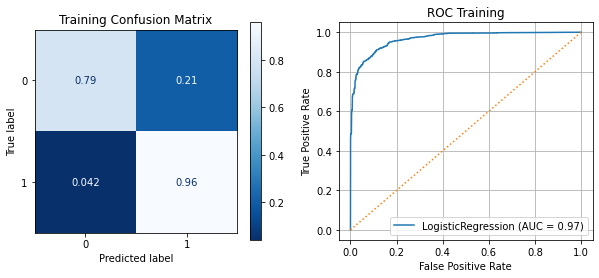

------------------------------------------------------------
LOGISTIC REGRESSION Testing Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      6413
           1       0.93      0.96      0.94     16608

    accuracy                           0.92     23021
   macro avg       0.90      0.88      0.89     23021
weighted avg       0.91      0.92      0.91     23021



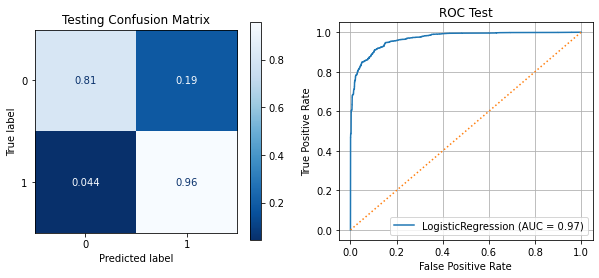

In [78]:
# Classification report from above function 
evaluation(log_reg,X_train_tf, X_test_tf, y_train, y_test, label = "LOGISTIC REGRESSION ")

### log_reg GridsearchCV

In [79]:
# Creating a parameter grid  for Logistic Regression 
parameter_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['l1', 'l2', 'elasticnet', None]}

# Creating a grid search 
grid = GridSearchCV(log_reg, parameter_grid, cv=3, scoring=f1_scorer) 

# Fitting X_train and y_train to grid 
gridlock = grid.fit(X_train_tf, y_train)

# Display best parameters 
gridlock.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

------------------------------------------------------------
LOGISTIC REGRESSION Training Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     19407
           1       0.93      0.96      0.94     49655

    accuracy                           0.92     69062
   macro avg       0.90      0.89      0.89     69062
weighted avg       0.92      0.92      0.92     69062



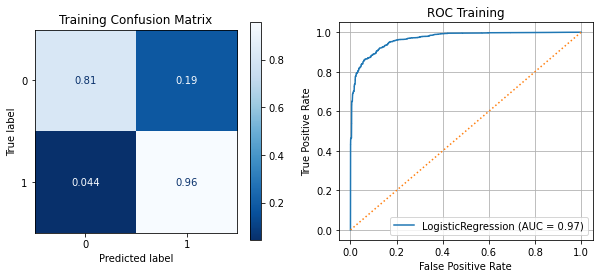

------------------------------------------------------------
LOGISTIC REGRESSION Testing Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6413
           1       0.94      0.95      0.94     16608

    accuracy                           0.92     23021
   macro avg       0.91      0.89      0.90     23021
weighted avg       0.92      0.92      0.92     23021



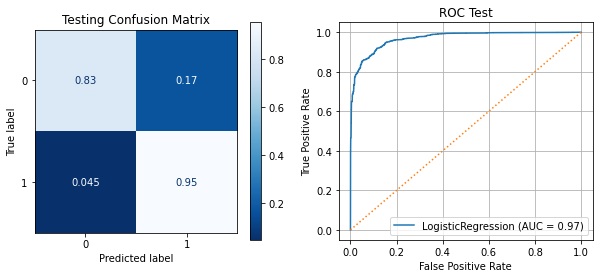

In [80]:
# Evaluate
evaluation(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label ="LOGISTIC REGRESSION ")

## Model 2: Decision Trees:

In [81]:
# Due to the large size, I will again take a smaller sample of the data to plot the tree.
small_sample = sample_data.sample(frac =.05)
  
small_sample

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,prim_contributory_cause,beat_of_occurrence,injuries,crash_day_of_week,unit_type,vehicle_type,sex,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,time_bins,speed_limit,age_groups
362169,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PED/CYCLIST,FOUR WAY,WET,NO DEFECTS,Y,UNABLE TO DETERMINE,1131.0,1,5,PEDESTRIAN,NaN,M,NaN,NaN,NONE PRESENT/UNUSED,NaN,NOT OBSCURED,Midnight/Early Morning,26-40,36-55
785988,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PED/CYCLIST,NOT DIVIDED,DRY,UNKNOWN-OTHER,NaN,UNABLE TO DETERMINE,233.0,1,5,PEDESTRIAN,NaN,M,NaN,NaN,SAFETY EQUIPMENT USED,NaN,NOT OBSCURED,Afternoon/Rush Hour,26-40,25-35
554556,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING-ANGLE,NOT DIVIDED,DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,1122.0,1,2,PEDESTRIAN,NaN,F,NaN,NaN,NONE PRESENT/UNUSED,NaN,OBSCURED,Afternoon/Rush Hour,26-40,56&Up
203358,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PED/CYCLIST,DIVIDED,DRY,NO DEFECTS,NaN,FAILING TO YIELD RIGHT-OF-WAY,1914.0,1,5,PEDESTRIAN,NaN,M,NaN,NaN,NONE PRESENT/UNUSED,NaN,NOT OBSCURED,Morning,26-40,16-24
185894,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PED/CYCLIST,DRIVEWAY-OTHER,DRY,NO DEFECTS,NaN,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",1213.0,1,6,PEDESTRIAN,NaN,M,NaN,NaN,USAGE UNKNOWN,NaN,NOT OBSCURED,Evening/Night,26-40,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702225,NO CONTROLS,NO CONTROLS,RAIN/CLOUDY/OTHER,DAYLIGHT,PED/CYCLIST,DIVIDED,WET,NO DEFECTS,NaN,UNABLE TO DETERMINE,834.0,1,7,PEDESTRIAN,NaN,F,NaN,NaN,NONE PRESENT/UNUSED,NaN,NOT OBSCURED,Afternoon/Rush Hour,26-40,36-55
146418,NO CONTROLS,UNKNOWN-NOT FUNCTIONING,NaN,DAYLIGHT,PED/CYCLIST,NOT DIVIDED,SNOW OR SLUSH,UNKNOWN-OTHER,NaN,WEATHER,1934.0,1,2,PEDESTRIAN,NaN,M,NaN,NaN,NONE PRESENT/UNUSED,NaN,NOT OBSCURED,Afternoon/Rush Hour,26-40,16-24
204047,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PED/CYCLIST,NOT DIVIDED,DRY,NO DEFECTS,NaN,UNABLE TO DETERMINE,1533.0,1,6,PEDESTRIAN,NaN,M,NaN,NaN,NaN,NaN,UNKNOWN,Afternoon/Rush Hour,26-40,36-55
220852,SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PED/CYCLIST,DRIVEWAY-OTHER,WET,NO DEFECTS,Y,IMPROPER LANE USAGE,821.0,1,3,PEDESTRIAN,NaN,F,NaN,NaN,NONE PRESENT/UNUSED,NaN,NaN,Midnight/Early Morning,26-40,NaN


In [82]:
# Instantiate DecisionTreeClassifier 
dt_class = DecisionTreeClassifier(max_depth = 10, random_state=42)

In [83]:
# Fitting the model 
dt_class.fit(X_train_tf, y_train)

# Prediction 
y_pred = dt_class.predict(X_test_tf)

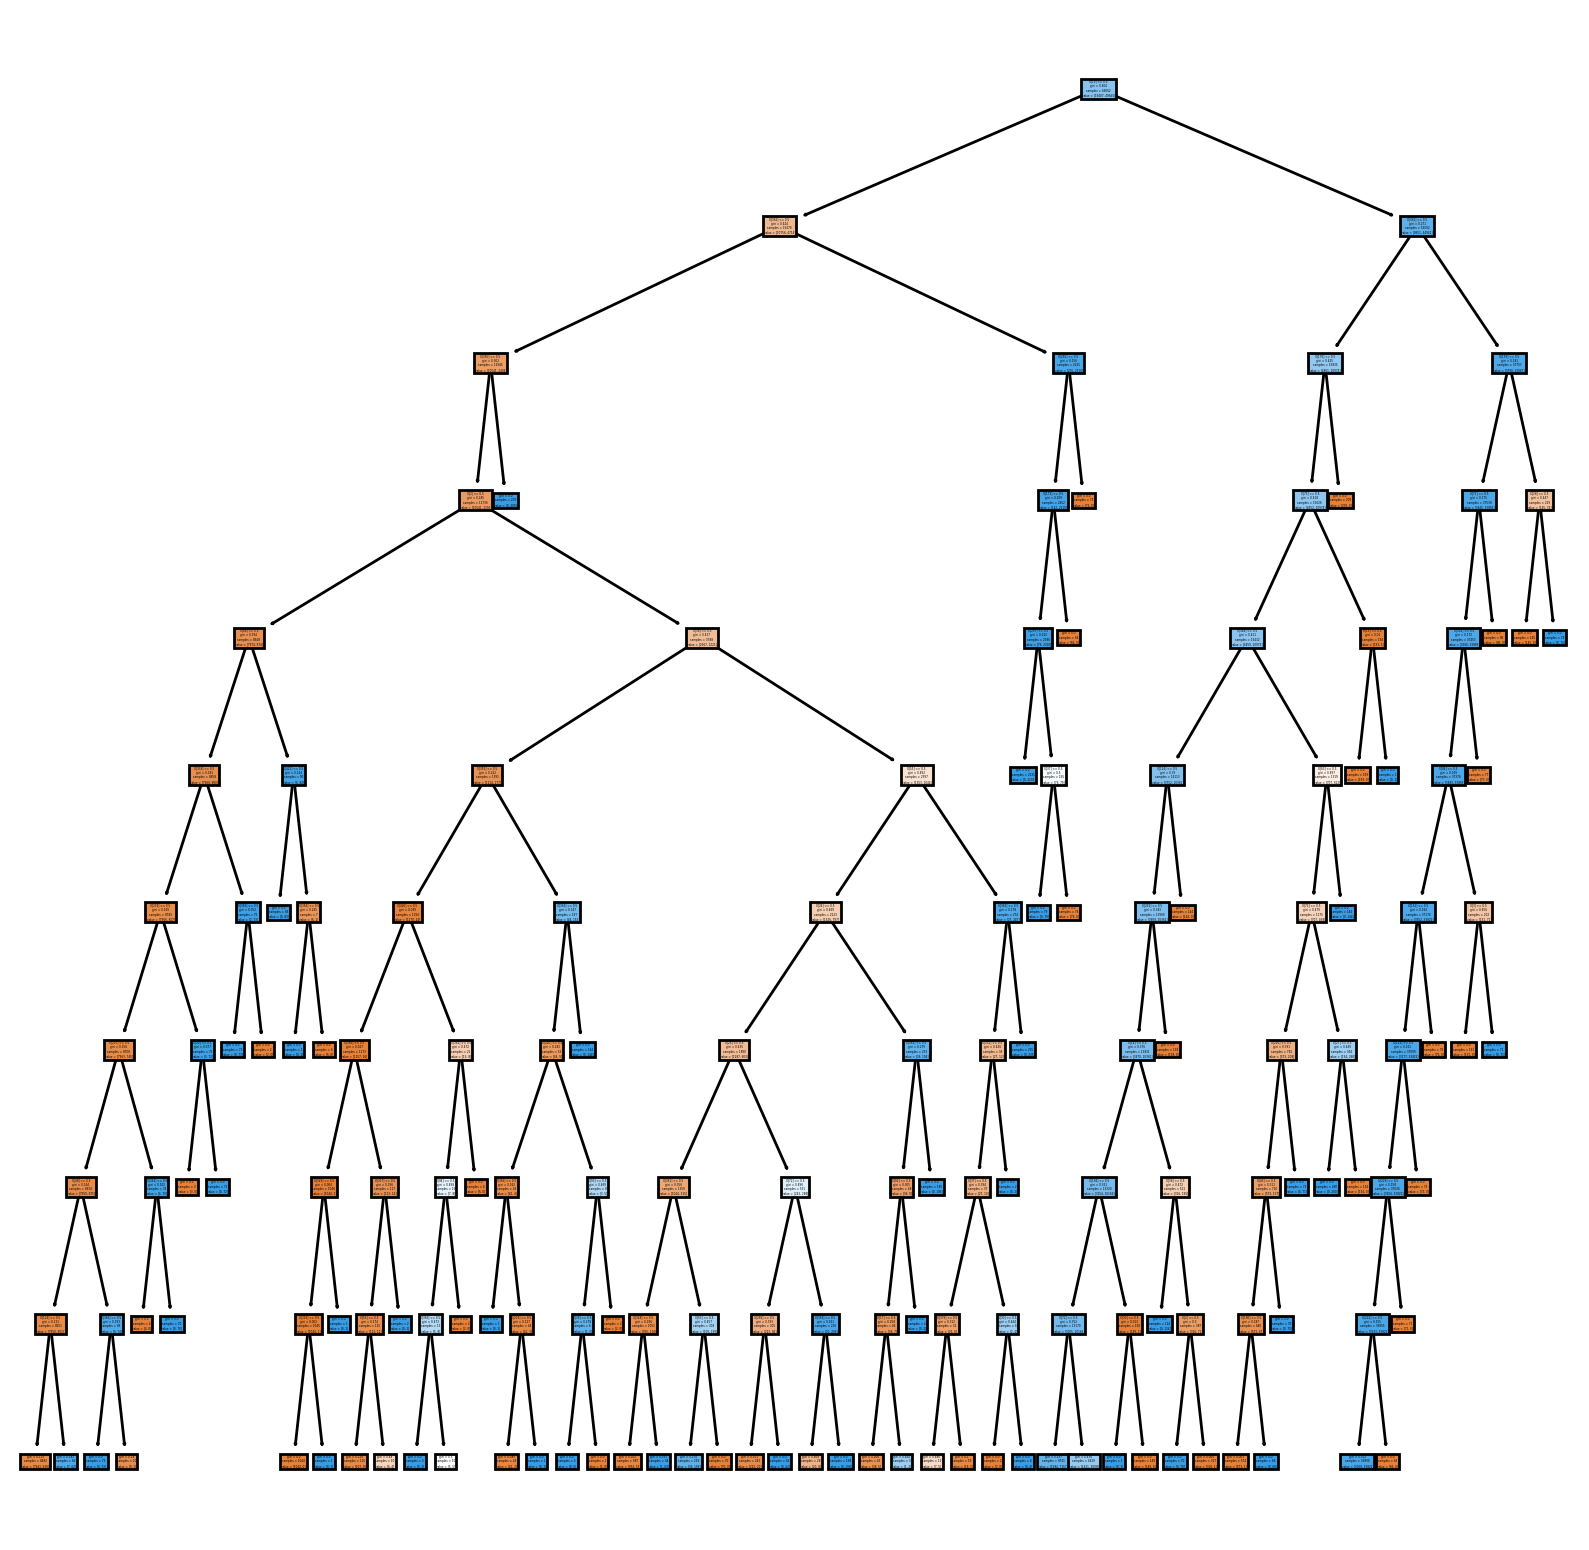

In [84]:
fig, axes = plt.subplots(figsize = (10,10), dpi=200)
tree.plot_tree(dt_class,
               filled = True);

### dt_class GridSearchCV

In [85]:
# Parameters grid for DecisionTreeClassifier  
parameter_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,12,20, None],
              'min_samples_leaf':[1, 5, 10, 20, 50, 100]}

# Creating a grid search 
grid = GridSearchCV(dt_class, parameter_grid, cv=3)

# Fitting to grid 
grid.fit(X_train_tf, y_train)
 
grid.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 20}

------------------------------------------------------------
DECISION TREE Training Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19407
           1       1.00      0.99      1.00     49655

    accuracy                           1.00     69062
   macro avg       0.99      1.00      0.99     69062
weighted avg       1.00      1.00      1.00     69062



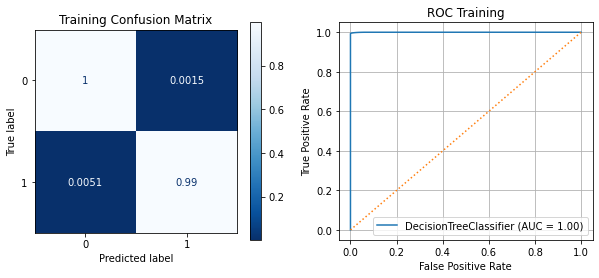

------------------------------------------------------------
DECISION TREE Testing Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6413
           1       1.00      0.99      1.00     16608

    accuracy                           1.00     23021
   macro avg       0.99      1.00      0.99     23021
weighted avg       1.00      1.00      1.00     23021



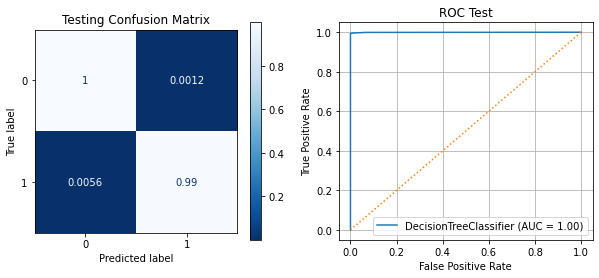

In [86]:
evaluation(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label="DECISION TREE ")

## Model 3: KNN (K-Nearest-Neighbors) Model:

### KNN Vanilla Model:

In [87]:
# Instantiate KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors= 5)

# Fitting the classifier
knn_class.fit(X_train_tf, y_train)

# Predicting on the test set
y_pred = knn_class.predict(X_test_tf)

------------------------------------------------------------
K-Nearest-NeighborsTraining Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19407
           1       1.00      1.00      1.00     49655

    accuracy                           1.00     69062
   macro avg       0.99      1.00      0.99     69062
weighted avg       1.00      1.00      1.00     69062



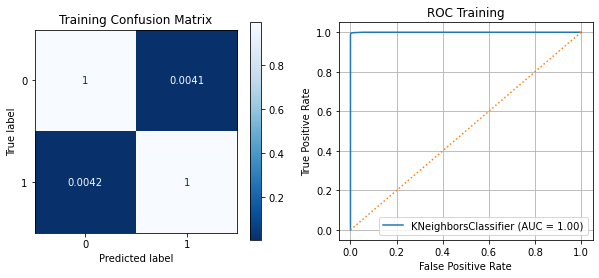

------------------------------------------------------------
K-Nearest-NeighborsTesting Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6413
           1       1.00      0.99      1.00     16608

    accuracy                           0.99     23021
   macro avg       0.99      0.99      0.99     23021
weighted avg       0.99      0.99      0.99     23021



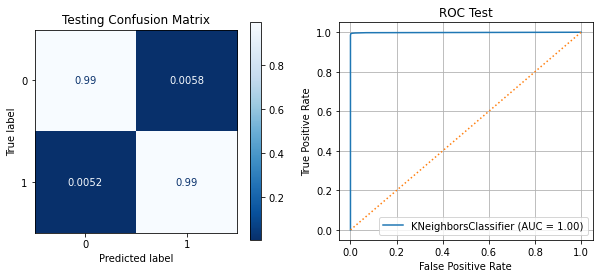

In [88]:
evaluation(knn_class, X_train_tf, X_test_tf, y_train, y_test, label = "K-Nearest-Neighbors")

## Model 4: Random Forest:

In [89]:
forest_class = RandomForestClassifier()

# Fitting
forest_class.fit(X_train_tf, y_train)

#Prediction
y_pred = forest_class.predict(X_test_tf)

------------------------------------------------------------
Random Forest Training Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19407
           1       1.00      1.00      1.00     49655

    accuracy                           1.00     69062
   macro avg       1.00      1.00      1.00     69062
weighted avg       1.00      1.00      1.00     69062



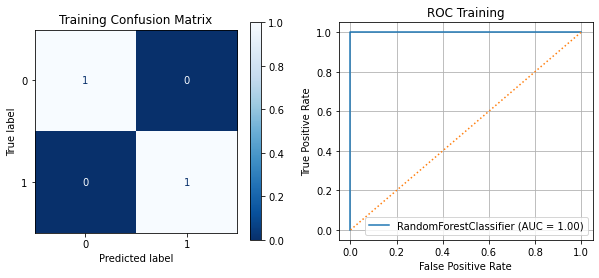

------------------------------------------------------------
Random Forest Testing Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6413
           1       1.00      0.99      1.00     16608

    accuracy                           1.00     23021
   macro avg       0.99      1.00      1.00     23021
weighted avg       1.00      1.00      1.00     23021



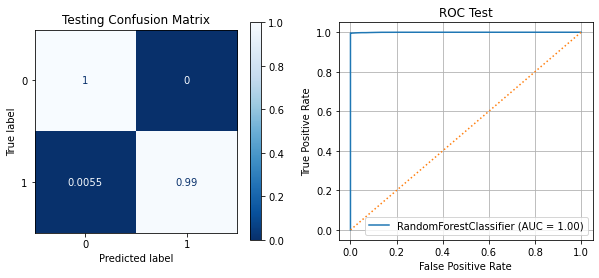

In [90]:
evaluation(forest_class, X_train_tf, X_test_tf, y_train, y_test, label = "Random Forest ")

### forest_class GridSearchCV:

In [91]:
parameter_grid = {'criterion': ['gini', 'entropy'],   
              'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Creating grid search 
grid = GridSearchCV(forest_class, parameter_grid, cv=3)

# Fitting x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

#Display
grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

------------------------------------------------------------
Random Forest Training Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19407
           1       1.00      1.00      1.00     49655

    accuracy                           1.00     69062
   macro avg       1.00      1.00      1.00     69062
weighted avg       1.00      1.00      1.00     69062



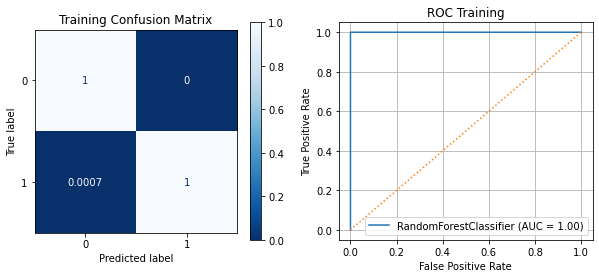

------------------------------------------------------------
Random Forest Testing Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6413
           1       1.00      0.99      1.00     16608

    accuracy                           1.00     23021
   macro avg       0.99      1.00      1.00     23021
weighted avg       1.00      1.00      1.00     23021



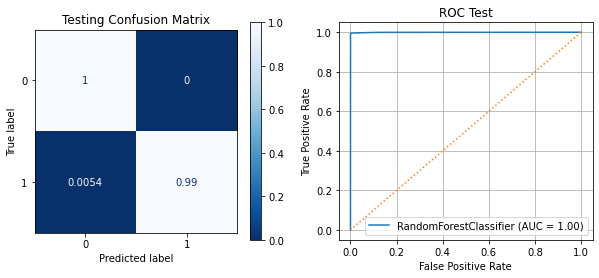

In [92]:
evaluation(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, label="Random Forest ")

In [93]:
best_class = grid.best_estimator_

# iNterpretation

Upon examination, I've determined the Logistic Regression Vanilla Model returned an accuracy rate of 92%
Our remaining models returned approximately the same rate or higher, however I've chosen this model since the accuracy rate on the training level was not 100%. This means we can somewhat avoid overfitting our model.

In [94]:
# Obtaining categorical columns from our pipeline and then converting to a dataframe
sliced_pipe = transformed.named_transformers_['cat']
categoric_features = sliced_pipe.named_steps['encoder'].get_feature_names(categorical_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *categoric_features])
X_train_tf

,traffic_control_device_NO CONTROLS,traffic_control_device_OTHER-UNKNOWN,traffic_control_device_SIGNAL/SIGN,device_condition_FUNCTIONING PROPERLY,device_condition_MISSING,device_condition_NO CONTROLS,device_condition_UNKNOWN-NOT FUNCTIONING,weather_condition_CLEAR,weather_condition_MISSING,weather_condition_RAIN/CLOUDY/OTHER,lighting_condition_DARKNESS,"lighting_condition_DARKNESS, LIGHTED ROAD",lighting_condition_DAWN,lighting_condition_DAYLIGHT,lighting_condition_DUSK,lighting_condition_UNKNOWN,first_crash_type_MISSING,first_crash_type_OTHER,first_crash_type_PARKED/FIXED,first_crash_type_PED/CYCLIST,first_crash_type_REAR END,first_crash_type_SIDESWIPE,first_crash_type_TURNING-ANGLE,trafficway_type_DIVIDED,trafficway_type_DRIVEWAY-OTHER,trafficway_type_FOUR WAY,trafficway_type_NOT DIVIDED,trafficway_type_ONE-WAY,trafficway_type_PARKING LOT,trafficway_type_UNKNOWN,roadway_surface_cond_DRY,roadway_surface_cond_ICE,roadway_surface_cond_OTHER,roadway_surface_cond_SNOW OR SLUSH,roadway_surface_cond_UNKNOWN,roadway_surface_cond_WET,road_defect_NO DEFECTS,road_defect_UNKNOWN-OTHER,hit_and_run_i_MISSING,hit_and_run_i_N,hit_and_run_i_Y,prim_contributory_cause_BICYCLE ADVANCING LEGALLY ON RED LIGHT,prim_contributory_cause_CELL PHONE USE OTHER THAN TEXTING,prim_contributory_cause_DISREGARDING OTHER TRAFFIC SIGNS,prim_contributory_cause_DISREGARDING ROAD MARKINGS,prim_contributory_cause_DISREGARDING STOP SIGN,prim_contributory_cause_DISREGARDING TRAFFIC SIGNALS,prim_contributory_cause_DISREGARDING YIELD SIGN,prim_contributory_cause_DISTRACTION - FROM INSIDE VEHICLE,prim_contributory_cause_DISTRACTION - FROM OUTSIDE VEHICLE,"prim_contributory_cause_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",prim_contributory_cause_DRIVING ON WRONG SIDE/WRONG WAY,prim_contributory_cause_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,prim_contributory_cause_EQUIPMENT - VEHICLE CONDITION,"prim_contributory_cause_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",prim_contributory_cause_FAILING TO REDUCE SPEED TO AVOID CRASH,prim_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY,prim_contributory_cause_FOLLOWING TOO CLOSELY,prim_contributory_cause_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),prim_contributory_cause_IMPROPER BACKING,prim_contributory_cause_IMPROPER LANE USAGE,prim_contributory_cause_IMPROPER OVERTAKING/PASSING,prim_contributory_cause_IMPROPER TURNING/NO SIGNAL,prim_contributory_cause_NOT APPLICABLE,prim_contributory_cause_OBSTRUCTED CROSSWALKS,"prim_contributory_cause_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",prim_contributory_cause_PHYSICAL CONDITION OF DRIVER,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER,beat_of_occurrence_1011.0,beat_of_occurrence_1012.0,beat_of_occurrence_1013.0,beat_of_occurrence_1014.0,beat_of_occurrence_1021.0,beat_of_occurrence_1022.0,beat_of_occurrence_1023.0,beat_of_occurrence_1024.0,beat_of_occurrence_1031.0,beat_of_occurrence_1032.0,beat_of_occurrence_1033.0,beat_of_occurrence_1034.0,beat_of_occurrence_111.0,beat_of_occurrence_1111.0,beat_of_occurrence_1112.0,beat_of_occurrence_1113.0,beat_of_occurrence_1114.0,beat_of_occurrence_1115.0,beat_of_occurrence_112.0,beat_of_occurrence_1121.0,beat_of_occurrence_1122.0,beat_of_occurrence_1123.0,beat_of_occurrence_1124.0,beat_of_occurrence_1125.0,beat_of_occurrence_113.0,beat_of_occurrence_1131.0,beat_of_occurrence_1132.0,beat_of_occurrence_1133.0,beat_of_occurrence_1134.0,beat_of_occurrence_1135.0,beat_of_occurrence_114.0,beat_of_occurrence_121.0,beat_of_occurrence_1211.0,beat_

<AxesSubplot:title={'center':'Feature Importance'}>

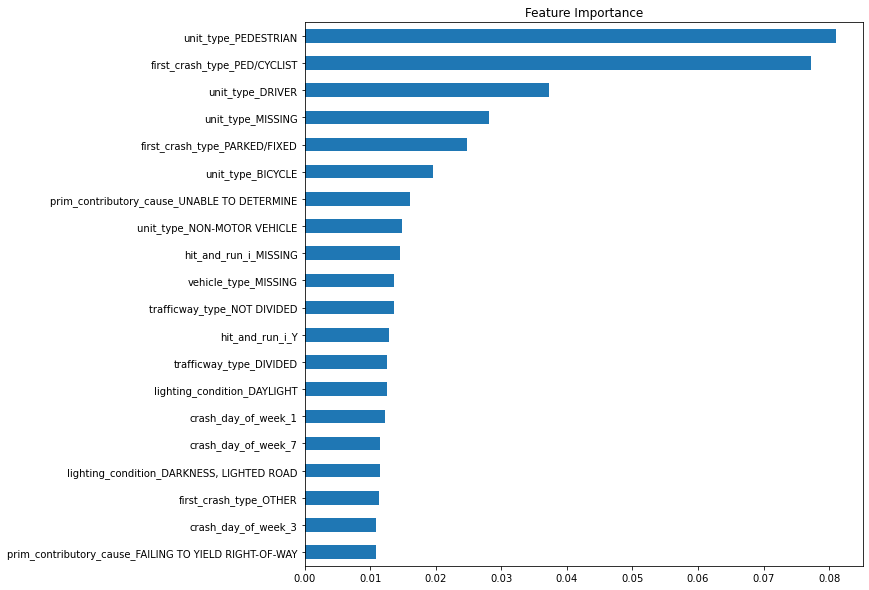

In [95]:
f_importance = pd.Series(best_class.feature_importances_ ,index=X_train_tf.columns)
f_importance.sort_values().tail(20).plot(kind='barh', figsize=(10,10), title = "Feature Importance")

### Observations:
Pedestrian, Ped/cyclist, and driver are the most correlated with injuries/accidents

# SHAP (SHapley Additive exPlanations)
*A game-theoretic approach to explain the output of any machine learning model.*

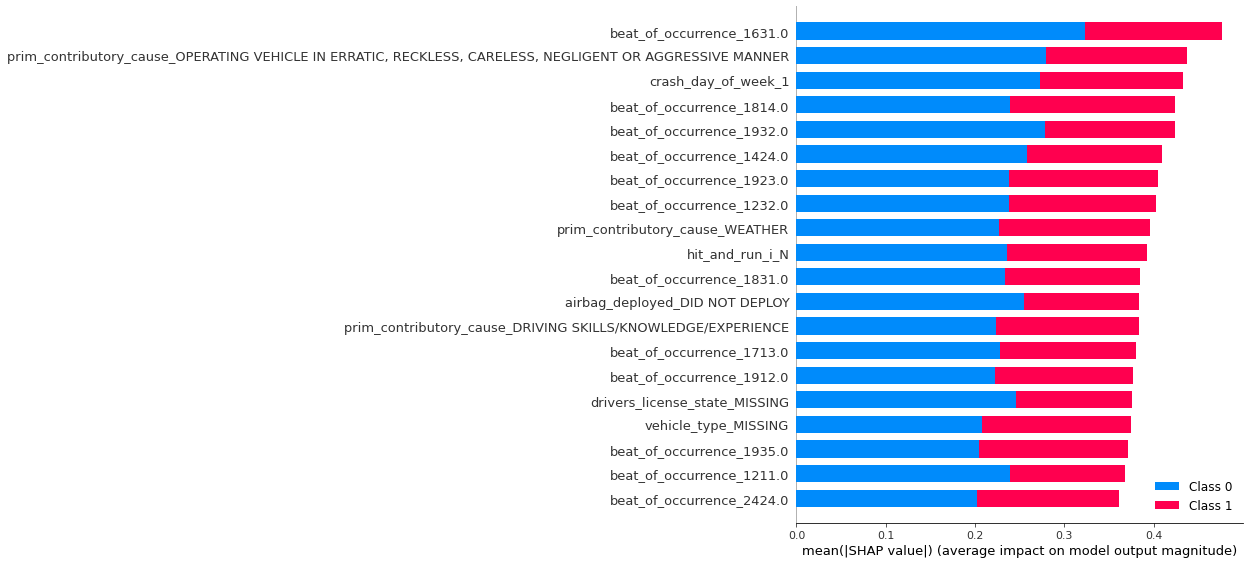

In [108]:
X_shap = shap.sample(X_train_tf)
explainer = shap.TreeExplainer(best_class)
shap_values = explainer.shap_values(X_shap, check_additivity=False)
shap.summary_plot(shap_values, X_shap, plot_type="bar")

### Observations:

* Most features have a 40/60 split between injuries and no injuries
* While driving recklessly or aggressively causes a lot of accidents, the resulting injuries are less than the lack thereof.
* Less injuries occur when the airbag did not deploy than injuries occurring
* Missing information on type of vehicle involved to determine if the type of vehicle is a cause of injury or not.

# Conclusions:

* After examining the data and based on our classification models, the injuries that that seem to result from accidents the most are **collisions between drivers and pedestrians or cyclists.**


* Accidents and injuries occur most often ***in the presence of traffic signals.***


* Additionally most accidents and resulting injuries take place in the **afternoon or during rush hour** as well as on **Saturdays.** 


* Most accidents occur in speed limit zones between **30-40 mph.**


**My recommendations are as follows:**

**The city install more cyclist friendly lanes and designated pedestrian walking areas.**

**Pedestrians and cyclists should be required to wear bright or reflective clothing when traveling at night and in poorly lit areas.**

**Rush hour speed limit could be lowered.**

**The city could plan to expand two way roads to include a median/divider to reduce the possibility of wrong way driver collisions**

**More patrol offered in areas with speed zones that are prone to more accidents.**

**More classes can be offered in regards to driving safety to teach drivers how to be aware of their surroundings, obey traffic laws, and control road rage.**
